### **Mount Google Drive on Google Colab**



In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



### **Kaggle Eye Diseases Classification Dataset Installation and Download**

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
#create a kaggle folder
! mkdir ~/.kaggle
#copy the kaggle .josn to folder created
! cp kaggle.json ~/.kaggle/
#permission for the json the act
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
! kaggle datasets download -d gunavenkatdoddi/eye-diseases-classification
! unzip eye-diseases-classification

Saving kaggle.json to kaggle.json
ref                                                        title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023               47KB  2023-08-26 11:04:57          28918        872  1.0              
iamsouravbanerjee/customer-shopping-trends-dataset         Customer Shopping Trends Dataset              146KB  2023-10-05 06:45:37           3161         81  1.0              
asaniczka/us-cost-of-living-dataset-3171-counties          US Cost of Living Dataset (1877 Counties)       1MB  2023-10-08 15:47:47            604         30  1.0              
mabelhsu/api-clean-top-1000-youtubers-statistics           Clean Top 1000 Youtube

### **Data Distribution of each class**



| Eye disease          | No. of images |
|:---------------------|:-------------:|
| Cataract             |     1038      |
| Diabetic retinopathy |     1098      |
| Glaucoma             |     1007      |
| Normal               |     1074      |
| **Total**            |   **4217**    |

## **Explore images**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'

### **Number of images in dataset:**

In [ ]:
import fnmatch
import os

In [ ]:
# image files count
cataract_count = len(fnmatch.filter(os.listdir('./dataset/cataract'), '*.*'))
dre_count = len(fnmatch.filter(os.listdir('./dataset/diabetic_retinopathy'), '*.*'))
glaucoma_count = len(fnmatch.filter(os.listdir('./dataset/glaucoma'), '*.*'))
normal_count = len(fnmatch.filter(os.listdir('./dataset/normal'), '*.*'))
total_image_count = cataract_count + dre_count + \
                    glaucoma_count + normal_count
# print count
print('---Categories---')
print('Cataract:', cataract_count)
print('Diabetic retinopathy:', dre_count)
print('Glaucoma:', glaucoma_count)
print('Normal', normal_count)
print()
print('---Total image count---')
print(total_image_count)

---Categories---
Cataract: 1038
Diabetic retinopathy: 1098
Glaucoma: 1007
Normal 1074

---Total image count---
4217


### **Image dimensions, properties:**

In [ ]:
from PIL import Image

In [ ]:
# load example image
im = Image.open('./dataset/glaucoma/1495_left.jpg')
# summarize some details about the image
print(im.format)
print(im.mode)
print(im.size) # size already 512 x 512

pixels = np.asarray(im)
print(pixels[0])
print(pixels.shape) # 3 channel last

JPEG
RGB
(512, 512)
[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]
(512, 512, 3)


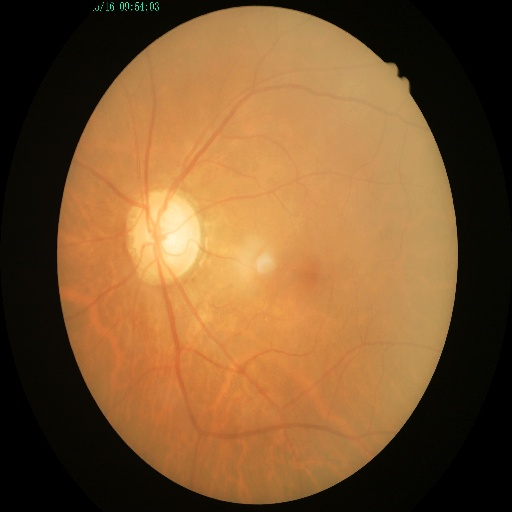

In [ ]:
#Import library
from IPython import display
display.Image(filename='./dataset/glaucoma/1495_left.jpg', width=200, height=150)

In [ ]:
# calculate image pixel mean, min, max

mean = pixels.mean()
print('Mean: %.3f' % mean)
# confirm pixel range is 0-255
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Mean: 86.173
Min: 0.000, Max: 255.000


### **Image hashing**

**To identify any duplicate images**


In [ ]:
import hashlib
import glob

In [ ]:
def img_hash(images, dir): # dir is string of subdirectory
    # https://stackoverflow.com/questions/22058048/hashing-a-file-in-python
    hash_list = [] # list of tuples (filename, hash)
    for image in images:
      with open(image, "rb") as f:
          hash = hashlib.blake2b(f.read()).hexdigest() # extract hash code
          filename = os.path.basename(image) # extract subdirectory and filename
          dir_filename = os.path.join(dir, filename)
          hash_list.append((dir_filename, hash))
          hash_df = pd.DataFrame(hash_list, columns=['filename','hash']) # dataframe of filenames & hashes
    return hash_df

In [ ]:
# hash cataract images
cataract_imgs = glob.glob("./dataset/cataract/*.*")
print(img_hash(images = cataract_imgs, dir='cataract')[:3]) # check format
# assign object to list
cataract_hashdf = img_hash(images = cataract_imgs, dir='cataract')

                    filename  \
0     cataract/1968_left.jpg   
1  cataract/_238_9445598.jpg   
2  cataract/_217_8865645.jpg   

                                                hash  
0  2ca93861c27a9fd3c9ed803e5c0a2655e439ba7fe3497b...  
1  2dcacb5f1f291c70a63c89bd41076fb652726aabc2935f...  
2  17c9b3904f3ad33622cfb8b48c1dd5d3e436ee7e462a84...  


In [ ]:
# hash diabetic retinopathy images
dre_imgs = glob.glob("./dataset/diabetic_retinopathy/*.*")
dre_hashdf = img_hash(images = dre_imgs, dir='dre')

In [ ]:
# hash glaucoma images
glaucoma_imgs = glob.glob("./dataset/glaucoma/*.*")
glaucoma_hashdf = img_hash(images = glaucoma_imgs, dir='glaucoma')

In [ ]:
# hash normal images
normal_imgs = glob.glob("./dataset/normal/*.*")
normal_hashdf = img_hash(images = normal_imgs, dir='normal')

In [ ]:
# join all the hash dataframes together
hash_df = pd.concat([cataract_hashdf, dre_hashdf, glaucoma_hashdf, normal_hashdf], ignore_index=True)
# check hash_list count # should be 4217
len(hash_df)

4217

#### **Search for duplicate hash codes:**

In [ ]:
duplicate_hashes = hash_df[hash_df.duplicated('hash', keep=False)] # based on hash codes only
print("Duplicate images based on hashcodes:")
print(duplicate_hashes) # 2 duplicate hashes.

Duplicate images based on hashcodes:
                     filename  \
292     cataract/625_left.jpg   
1028  cataract/1415_right.jpg   
2411    glaucoma/625_left.jpg   
3126  glaucoma/1415_right.jpg   

                                                   hash  
292   9b41fcbbbdd4a1429f16d915f026d87f7a94f9a77eb3ef...  
1028  a029f6e63fa8919142ac8a4c024caf81db515aa44bf4a7...  
2411  9b41fcbbbdd4a1429f16d915f026d87f7a94f9a77eb3ef...  
3126  a029f6e63fa8919142ac8a4c024caf81db515aa44bf4a7...  


## **Visualise preprocessed images**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
print(tf.__version__) #2.8.2

2.13.0


**What happens after resizing and rescaling:**

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(160,160) ,  # needs to be symmetrical
    layers.Rescaling(1./255) # desired height, width in model pipeline
])

result = resize_and_rescale(pixels)
print(result.shape) # new shape, channels

(160, 160, 3)


**What happens to image pixel values after rescaling:**

In [ ]:
print("Min and max pixel values:", result.numpy().min(), result.numpy().max())

Min and max pixel values: 0.0 1.0


**Show images before and after preprocessing:**

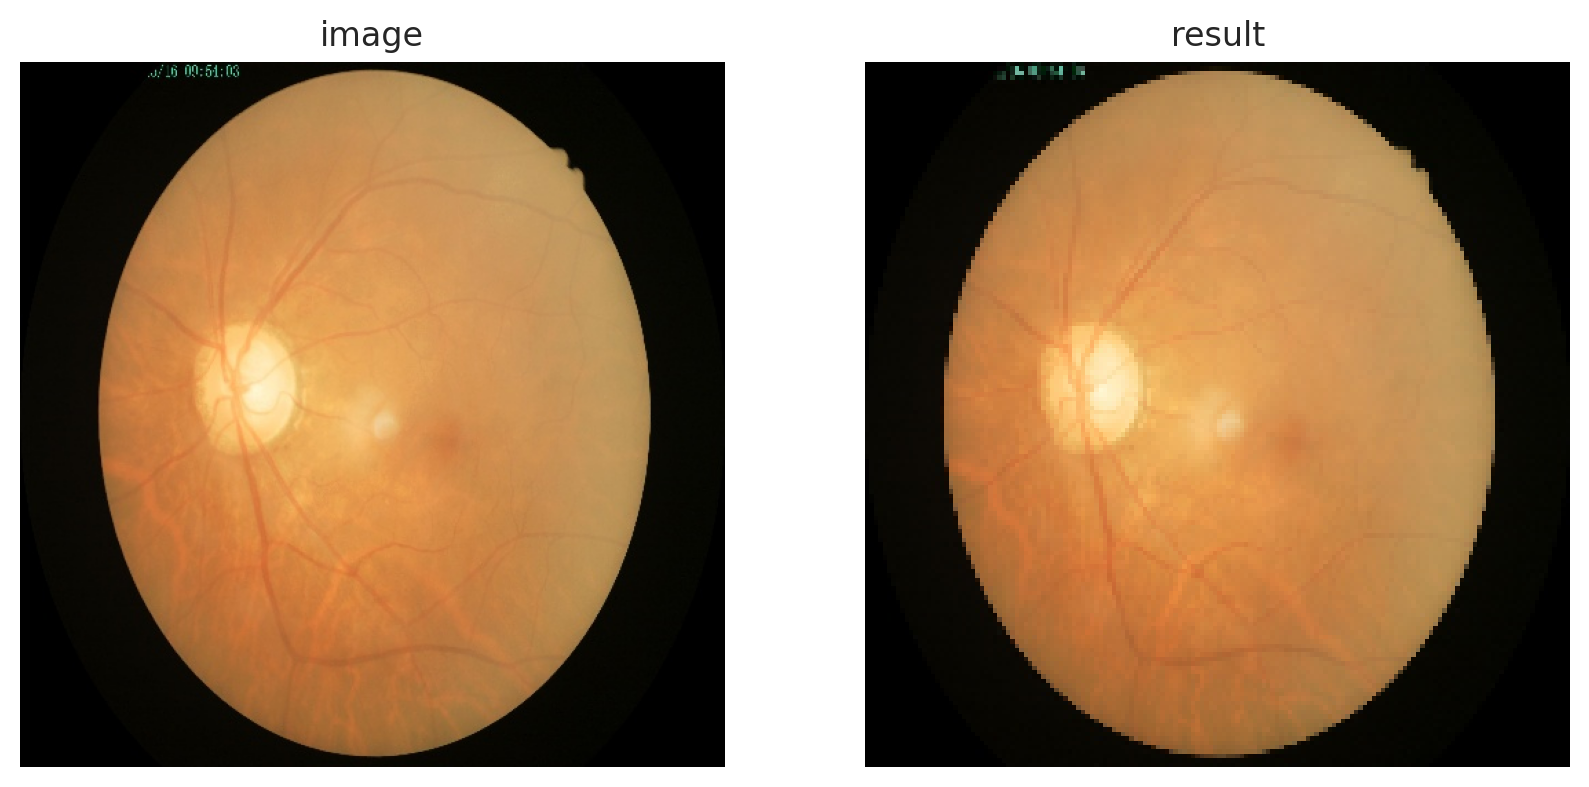

In [ ]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,8))
ax0.imshow(im)
ax0.axis('off')
ax0.set_title('image')
# after pixel normalisation
ax1.imshow(result)
ax1.axis('off')
ax1.set_title('result')
plt.show() # result seems to have slight blurring of image, but still good definition

## **Create train, validation and test datasets**

In [ ]:
!pip install split-folders

In [ ]:
# first allocate a test set using this library
import splitfolders

splitfolders.ratio('./dataset/', output="./work_directory/", seed=1, ratio=(.5,.25,.25))

Copying files: 4217 files [00:00, 4395.08 files/s]


In [ ]:
# generate dataset that can be used for machine learning
from tensorflow.keras.utils import image_dataset_from_directory

image_size = (160, 160) # very important to get this right, will determine model success
batch_size = 32

train_ds = image_dataset_from_directory(
    './work_directory/train',
    image_size=image_size,
    shuffle=False,
    #labels='inferred',
    seed=1,
    batch_size=batch_size,
    label_mode='categorical'
)

val_ds = image_dataset_from_directory(
    './work_directory/val',
    image_size=image_size,
    shuffle=False,
    #labels='inferred',
    seed=1,
    batch_size=batch_size,
    label_mode='categorical'
)

test_ds = image_dataset_from_directory( # for model evaluation later
    './work_directory/test',
    image_size=image_size,
    #labels='inferred',
    seed=1,
    shuffle=False,
    batch_size=batch_size,
    label_mode='categorical'
)

Found 2108 files belonging to 4 classes.
Found 1052 files belonging to 4 classes.
Found 1057 files belonging to 4 classes.


In [ ]:
# preview of how images are labelled
class_names = train_ds.class_names
print(class_names)

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']


### **Visualise images and labels together**

In [ ]:
# visualise label format # one-hot encoded
for _, labels in train_ds.take(1):
  print(labels[0])
  print(tf.argmax(labels[0], axis=0))
  break

tf.Tensor([1. 0. 0. 0.], shape=(4,), dtype=float32)
tf.Tensor(0, shape=(), dtype=int64)


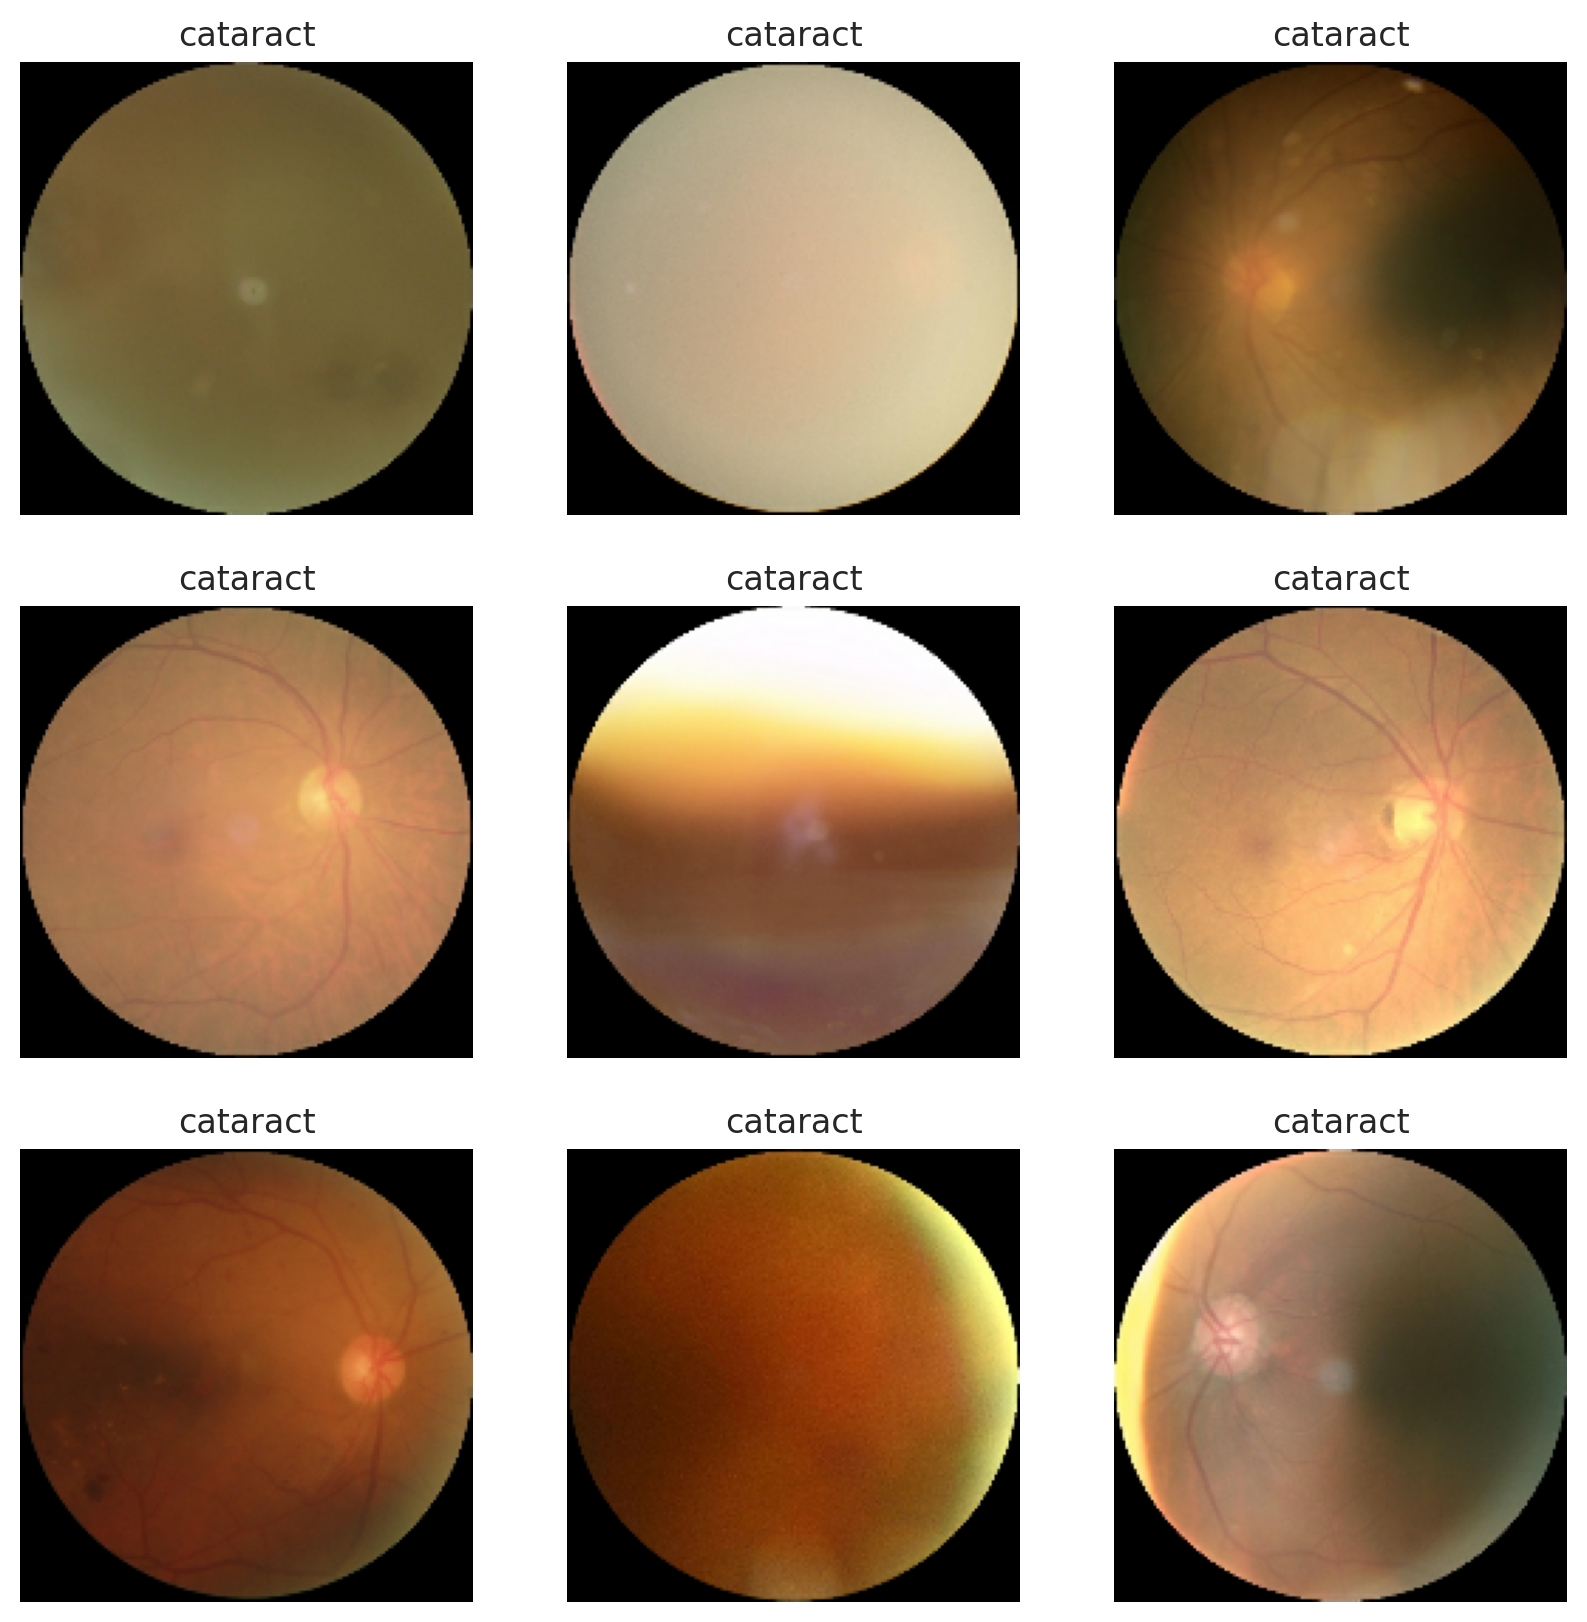

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1): # each image 160 x 160
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[tf.argmax(labels[i], axis=0)])
    plt.axis("off")

## **Data augmentation**

In [ ]:
data_augmentation = tf.keras.Sequential(
    [ layers.RandomFlip("horizontal"),
      layers.RandomRotation(0.1),
      layers.RandomContrast(0.1)
    ])

### **Visualise augmented images**

In [ ]:
def augmented_img():
  for image, _ in train_ds.take(2):  # take a sample image from training set
    plt.figure(figsize=(8, 8))
    first_image = image[0]
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
      plt.imshow(augmented_image[0] / 255) # rescale pixel 0 to 1
      plt.axis("off")

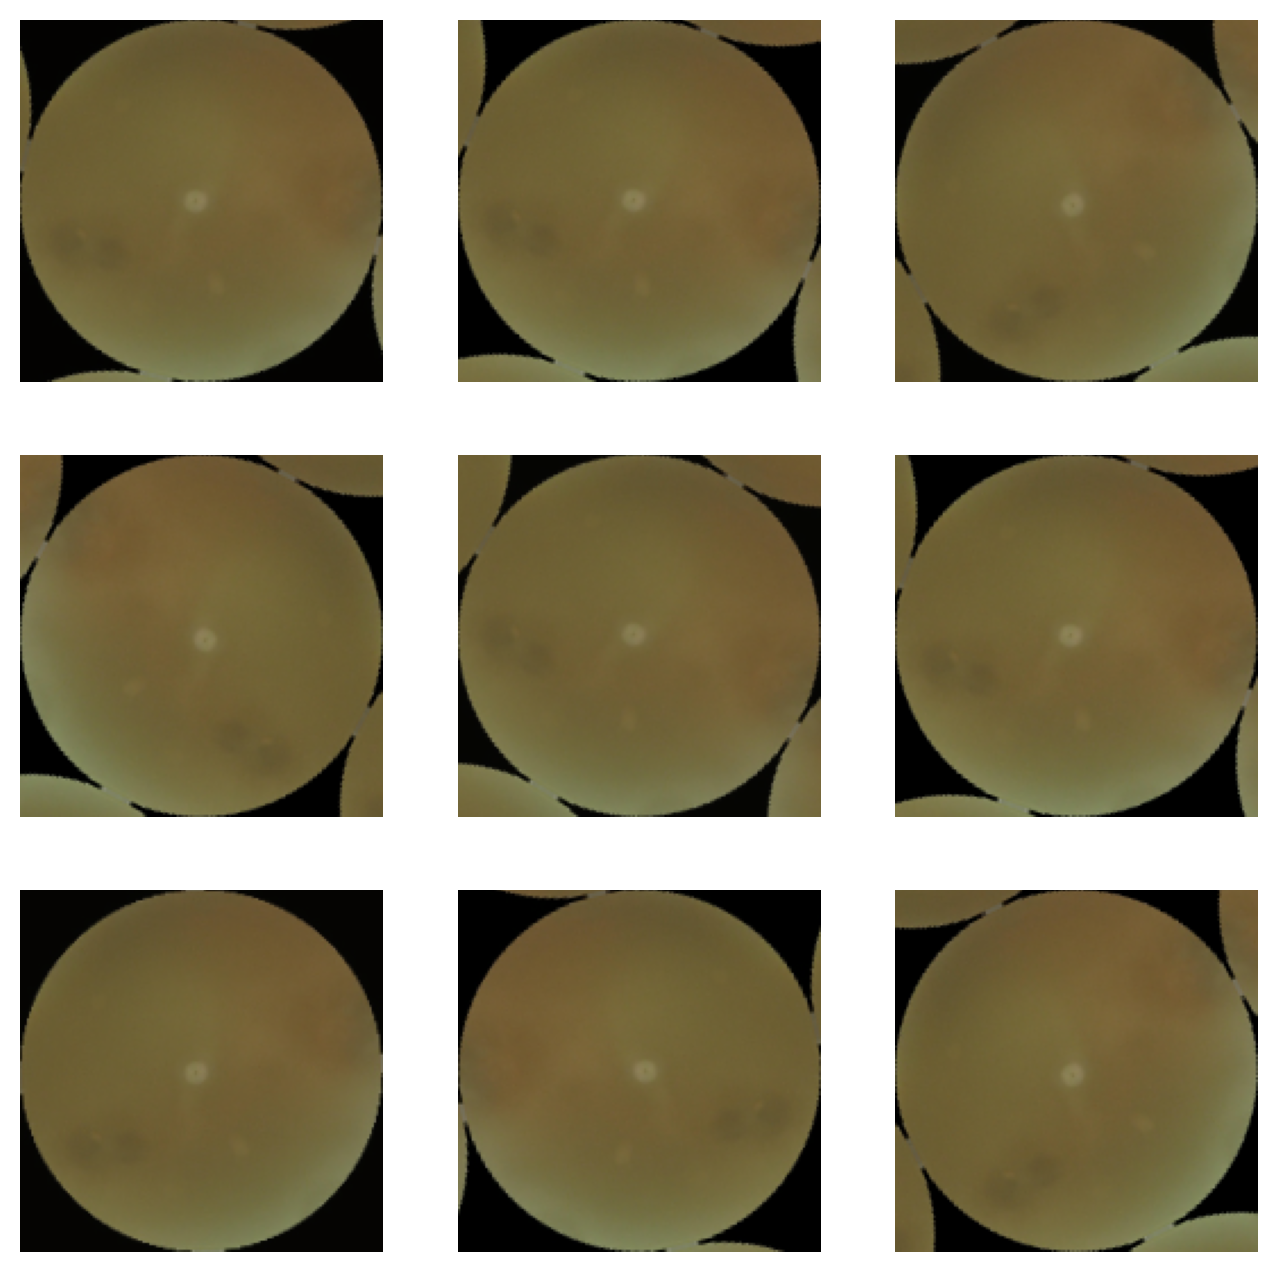

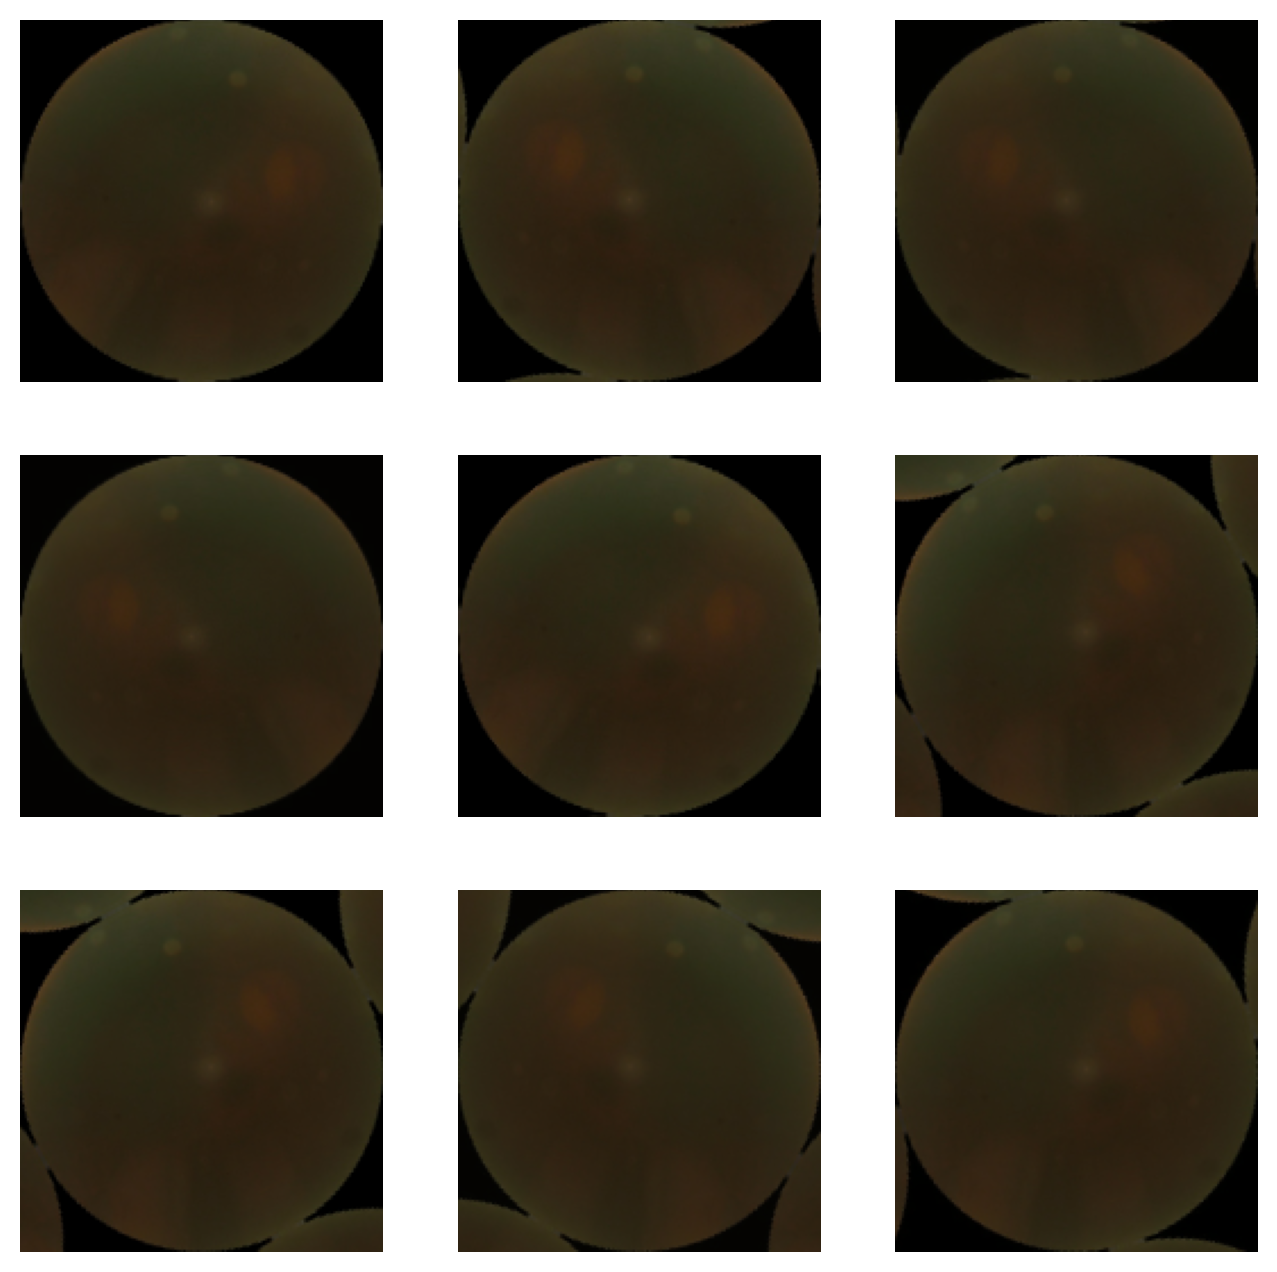

In [ ]:
augmented_img()

## **Create DenseNet model**



In [ ]:
import keras.backend as K # function to add F1 score as metric

def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      f1_score
]

### **DenseNet-169**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras import regularizers

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomContrast(0.1)
])

def DenseNetWithAugmentation():
    input_shape = (160, 160, 3)

    # Input layer with data augmentation
    inputs = tf.keras.Input(shape=input_shape)
    x = data_augmentation(inputs)

    # Rescaling layer
    x = Rescaling(1./255)(x)

    # Load the pre-trained DenseNet169 model
    base_model = DenseNet169(input_shape=input_shape,
                             include_top=False,
                             weights='imagenet',
                             pooling='max')

    base_model.trainable = True  # Train entire model layers, yet with pre-trained weights from ImageNet

    x = base_model(x, training=True)
    x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)

    x = Dense(256, kernel_regularizer=regularizers.l2(l=0.001),
              activity_regularizer=regularizers.l1(0.001),
              bias_regularizer=regularizers.l1(0.001),
              activation='relu')(x)

    # Add a dropout layer with 50% dropout rate
    x = Dropout(rate=0.5, seed=123)(x)

    # Add an output layer with 4 neurons and softmax activation
    output = Dense(4, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=output)

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9)  # Use beta_1 for momentum
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=METRICS)  # Assuming METRICS is defined somewhere in your code

    return model

denseNet_model_with_augmentation = DenseNetWithAugmentation()

#### **Compile, fit model, run**

In [ ]:
# Train the model, doing validation at the end of each epoch.
epochs = 250
batch_size = 32

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("drive/MyDrive/Colab Notebooks/DenseNet_169/DenseNet169_ep{epoch}_val{val_loss:.3f}", save_best_only=True),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.001, restore_best_weights=True),
    tf.keras.callbacks.CSVLogger('drive/MyDrive/Colab Notebooks/DenseNet_169/DenseNet169_history.csv'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, mode='min', min_lr=0.00001)
]

history = denseNet_model_with_augmentation.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=callbacks, batch_size=batch_size)

Epoch 1/250
66/66 [==============================] - 240s 2s/step - loss: 2.4249 - categorical_accuracy: 0.5772 - precision: 0.6489 - recall: 0.5323 - auc: 0.8067 - f1_score: 0.7349 - val_loss: 15.0415 - val_categorical_accuracy: 0.2548 - val_precision: 0.2550 - val_recall: 0.2548 - val_auc: 0.5034 - val_f1_score: 0.2576 - lr: 0.0010
Epoch 2/250
66/66 [==============================] - 116s 2s/step - loss: 4.2440 - categorical_accuracy: 0.6219 - precision: 0.6236 - recall: 0.6162 - auc: 0.7988 - f1_score: 0.6194 - val_loss: 10.2939 - val_categorical_accuracy: 0.2548 - val_precision: 0.2548 - val_recall: 0.2548 - val_auc: 0.5021 - val_f1_score: 0.2576 - lr: 0.0010
Epoch 3/250
66/66 [==============================] - 109s 2s/step - loss: 4.2283 - categorical_accuracy: 0.6219 - precision: 0.6278 - recall: 0.6034 - auc: 0.8128 - f1_score: 0.6143 - val_loss: 6.6782 - val_categorical_accuracy: 0.2548 - val_precision: 0.2557 - val_recall: 0.2471 - val_auc: 0.4881 - val_f1_score: 0.2540 - lr: 

### **DenseNet-121**

In [ ]:
from tensorflow.keras.layers import RandomCrop, RandomFlip, RandomRotation
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import regularizers

def DenseNetWithAugmentation():
    input_shape = (160, 160, 3)

    # Input layer with data augmentation
    inputs = tf.keras.Input(shape=input_shape)
    x = data_augmentation(inputs)

    # Rescaling layer
    x = tf.keras.layers.Rescaling(1./255)(x)

    # Load the pre-trained DenseNet121 model
    base_model = tf.keras.applications.DenseNet121(input_shape=input_shape,
                             include_top=False,
                             weights='imagenet',
                             pooling='max')

    base_model.trainable = True  # Train entire model layers, yet with pre-trained weights from ImageNet

    x = base_model(x, training=True)
    x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)

    x = Dense(256, kernel_regularizer=regularizers.l2(l=0.001),
              activity_regularizer=regularizers.l1(0.001),
              bias_regularizer=regularizers.l1(0.001),
              activation='relu')(x)

    # Add a dropout layer with 40% dropout rate
    x = Dropout(rate=0.4, seed=123)(x)

    # Add an output layer with 4 neurons and softmax activation
    output = Dense(4, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=output)

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=METRICS)
    return model

denseNet_model_with_augmentation = DenseNetWithAugmentation()

29084464/29084464 [==============================] - 0s 0us/step


#### **Compile, fit model, run**

In [ ]:
# Train the model, doing validation at the end of each epoch.
epochs = 250
# /content/drive/MyDrive/Colab Notebooks/DenseNet_121
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("drive/MyDrive/Colab Notebooks/DenseNet_121/DenseNet121_ep{epoch}_val{val_loss:.3f}", save_best_only=True),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10,min_delta=0.001,restore_best_weights=True),
    tf.keras.callbacks.CSVLogger('drive/MyDrive/Colab Notebooks/DenseNet_121/DenseNet121_history.csv'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,mode='min',min_lr=0.00001)
]

history = denseNet_model_with_augmentation.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=callbacks)

Epoch 1/200
66/66 [==============================] - 157s 1s/step - loss: 1.6524 - categorical_accuracy: 0.5650 - precision: 0.6374 - recall: 0.4677 - auc: 0.7937 - f1_score: 0.5274 - val_loss: 2.7269 - val_categorical_accuracy: 0.2167 - val_precision: 0.2338 - val_recall: 0.1644 - val_auc: 0.4727 - val_f1_score: 0.1906 - lr: 1.0000e-04
Epoch 2/200
66/66 [==============================] - 24s 357ms/step - loss: 1.4993 - categorical_accuracy: 0.6675 - precision: 0.7220 - recall: 0.5878 - auc: 0.8508 - f1_score: 0.6398 - val_loss: 2.8308 - val_categorical_accuracy: 0.2757 - val_precision: 0.2762 - val_recall: 0.2376 - val_auc: 0.4819 - val_f1_score: 0.2504 - lr: 1.0000e-04
Epoch 3/200
66/66 [==============================] - 72s 1s/step - loss: 1.3487 - categorical_accuracy: 0.7415 - precision: 0.7871 - recall: 0.6750 - auc: 0.8917 - f1_score: 0.7169 - val_loss: 2.7060 - val_categorical_accuracy: 0.2842 - val_precision: 0.2822 - val_recall: 0.2376 - val_auc: 0.4860 - val_f1_score: 0.2527

In [ ]:
# Train the model, doing validation at the end of each epoch.
epochs = 200
# /content/drive/MyDrive/Colab Notebooks/DenseNet_121
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("drive/MyDrive/Colab Notebooks/DenseNet_121_a/DenseNet121_ep{epoch}_val{val_loss:.3f}", save_best_only=True),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10,min_delta=0.001,restore_best_weights=True),
    tf.keras.callbacks.CSVLogger('drive/MyDrive/Colab Notebooks/DenseNet_121_a/DenseNet121_history.csv'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,mode='min',min_lr=0.00001)
]

history = denseNet_model_with_augmentation.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=callbacks)

Epoch 1/200
66/66 [==============================] - 77s 1s/step - loss: 0.3811 - categorical_accuracy: 0.9862 - precision: 0.9871 - recall: 0.9839 - auc: 0.9998 - f1_score: 0.9853 - val_loss: 1.1103 - val_categorical_accuracy: 0.6578 - val_precision: 0.9382 - val_recall: 0.4620 - val_auc: 0.8858 - val_f1_score: 0.5232 - lr: 1.0000e-05
Epoch 2/200
66/66 [==============================] - 23s 353ms/step - loss: 0.3645 - categorical_accuracy: 0.9962 - precision: 0.9967 - recall: 0.9953 - auc: 0.9999 - f1_score: 0.9960 - val_loss: 1.1110 - val_categorical_accuracy: 0.6578 - val_precision: 0.9327 - val_recall: 0.4610 - val_auc: 0.8839 - val_f1_score: 0.5183 - lr: 1.0000e-05
Epoch 3/200
66/66 [==============================] - 74s 1s/step - loss: 0.3651 - categorical_accuracy: 0.9948 - precision: 0.9948 - recall: 0.9929 - auc: 0.9999 - f1_score: 0.9938 - val_loss: 1.0999 - val_categorical_accuracy: 0.6683 - val_precision: 0.9259 - val_recall: 0.4629 - val_auc: 0.8891 - val_f1_score: 0.5219 

In [ ]:
import tensorflow as tf

METRICS = [
    tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc'),
    f1_score
]


data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomContrast(0.1),
    layers.RandomCrop(height=160, width=160)  # Specify desired_height and desired_width
])



from tensorflow.keras.layers import RandomCrop, RandomFlip, RandomRotation
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import regularizers

def DenseNetWithAugmentation():
  input_shape = (160, 160, 3)

  # Input layer with data augmentation
  inputs = tf.keras.Input(shape=input_shape)
  x = data_augmentation(inputs)

  # Rescaling layer
  x = tf.keras.layers.Rescaling(1./255)(x)

  # Load the pre-trained DenseNet121 model
  base_model = tf.keras.applications.DenseNet121(input_shape=input_shape,
                                              include_top=False,
                                              weights='imagenet',
                                              pooling='max')

  base_model.trainable = True

  x = base_model(x, training=True)
  x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)

  x = Dense(256, kernel_regularizer=regularizers.l2(l=0.001),
            activity_regularizer=regularizers.l1(0.001),
            bias_regularizer=regularizers.l1(0.001),
            activation='relu')(x)

  # Add a dropout layer with 40% dropout rate
  x = Dropout(rate=0.4, seed=123)(x)

  # Add an output layer with 4 neurons and softmax activation
  output = Dense(4, activation='softmax')(x)

  model = tf.keras.Model(inputs=inputs, outputs=output)

  # Compile the model
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
                loss='categorical_crossentropy',
                metrics=METRICS)
  return model

denseNet_model_with_augmentation = DenseNetWithAugmentation()


# Train the model, doing validation at the end of each epoch.
epochs = 300

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("drive/MyDrive/Colab Notebooks/DenseNet_121_b/DenseNet121_ep{epoch}_val{val_loss:.3f}", save_best_only=True),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10,min_delta=0.001,restore_best_weights=True),
    tf.keras.callbacks.CSVLogger('drive/MyDrive/Colab Notebooks/DenseNet_121_b/DenseNet121_history.csv'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=5,verbose=1,mode='min',min_lr=0.00001)
]

history = denseNet_model_with_augmentation.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=callbacks)


29084464/29084464 [==============================] - 0s 0us/step
Epoch 1/300
66/66 [==============================] - 137s 967ms/step - loss: 2.4031 - categorical_accuracy: 0.2358 - precision: 0.2308 - recall: 0.1395 - auc: 0.4935 - f1_score: 0.1711 - val_loss: 2.5184 - val_categorical_accuracy: 0.2414 - val_precision: 0.2315 - val_recall: 0.1454 - val_auc: 0.4929 - val_f1_score: 0.1767 - lr: 1.0000e-05
Epoch 2/300
66/66 [==============================] - 57s 875ms/step - loss: 2.3624 - categorical_accuracy: 0.2552 - precision: 0.2674 - recall: 0.1551 - auc: 0.5045 - f1_score: 0.1951 - val_loss: 2.2406 - val_categorical_accuracy: 0.2433 - val_precision: 0.2440 - val_recall: 0.1160 - val_auc: 0.5008 - val_f1_score: 0.1541 - lr: 1.0000e-05
Epoch 3/300
66/66 [==============================] - 58s 893ms/step - loss: 2.2654 - categorical_accuracy: 0.2818 - precision: 0.2835 - recall: 0.1675 - auc: 0.5308 - f1_score: 0.2084 - val_loss: 2.1391 - val_categorical_accuracy: 0.2490 - val_precisio

# **Learning Curves**

In [ ]:
history = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DenseNet_121_b/DenseNet121_history.csv')
history.head(3)

epoch       auc  categorical_accuracy  f1_score      loss  precision  \
0      0  0.493508              0.235768  0.171060  2.403129   0.230769   
1      1  0.504473              0.255218  0.195143  2.362355   0.267375   
2      2  0.530775              0.281784  0.208357  2.265363   0.283534   

     recall   val_auc  val_categorical_accuracy  val_f1_score  val_loss  \
0  0.139469  0.492854                  0.241445      0.176728  2.518444   
1  0.155123  0.500792                  0.243346      0.154115  2.240639   
2  0.167457  0.511518                  0.249049      0.140085  2.139102   

   val_precision  val_recall  
0       0.231467    0.145437  
1       0.244000    0.115970  
2       0.260652    0.098859

In [ ]:
history.iloc[121]

epoch                       121.000000
auc                           0.999390
categorical_accuracy          0.982922
f1_score                      0.981255
loss                          0.489725
precision                     0.983794
recall                        0.979127
val_auc                       0.971588
val_categorical_accuracy      0.834601
val_f1_score                  0.792331
val_loss                      0.863014
val_precision                 0.922894
val_recall                    0.739544
Name: 121, dtype: float64

In [ ]:
history.tail(10)

epoch       auc  categorical_accuracy  f1_score      loss  precision  \
121    121  0.999390              0.982922  0.981255  0.489725   0.983794   
122    122  0.999655              0.989089  0.989185  0.473688   0.990490   
123    123  0.999561              0.986717  0.986246  0.478915   0.987167   
124    124  0.999674              0.989564  0.987701  0.473881   0.989529   
125    125  0.999024              0.975806  0.975166  0.493375   0.976700   
126    126  0.982277              0.901803  0.894876  0.712269   0.913641   
127    127  0.958383              0.847249  0.842165  0.895707   0.854713   
128    128  0.987876              0.915085  0.908770  0.673831   0.924621   
129    129  0.997952              0.962524  0.960553  0.550170   0.965964   
130    130  0.996749              0.958729  0.956303  0.556863   0.962554   

       recall   val_auc  val_categorical_accuracy  val_f1_score  val_loss  \
121  0.979127  0.971588                  0.834601      0.792331  0.863014   
122  0.988140  0.969927                  0.831749      0.781106  0.868740   
123  0.985294  0.968325                  0.818441      0.773593  0.872722   
124  0.986243  0.969133                  0.821293      0.780164  0.866986   
125  0.974383  0.951199                  0.785171      0.715155  0.958939   
126  0.883302  0.874904                  0.665399      0.583902  1.242909   
127  0.834440  0.866903                  0.625475      0.527342  1.253973   
128  0.896110  0.943163                  0.761407      0.705327  1.016842   
129  0.955882  0.958744                  0.807034      0.756537  0.944705   
130  0.951138  0.955380                  0.796578      0.743846  0.948119   

     val_precision  val_recall  
121       0.922894    0.739544  
122       0.923077    0.730038  
123       0.913979    0.727186  
124       0.921053    0.731939  
125       0.901042    0.657795  
126       0.767313    0.526616  
127       0.746627    0.473384  
128       0.894244    0.634981  
129       0.917826    0.690114  
130       0.908521    0.689164

In [ ]:
acc = history['categorical_accuracy']
val_acc = history['val_categorical_accuracy']

loss = history['loss']
val_loss = history['val_loss']

In [ ]:
def learning_curves(acc,val_acc,loss,val_loss):
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim([min(plt.ylim()),max(plt.ylim())])
  plt.xlim([0,max(plt.xlim())])
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim([min(plt.ylim()),max(plt.ylim())])
  plt.xlim([0,max(plt.xlim())])
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()
  return plt.show()

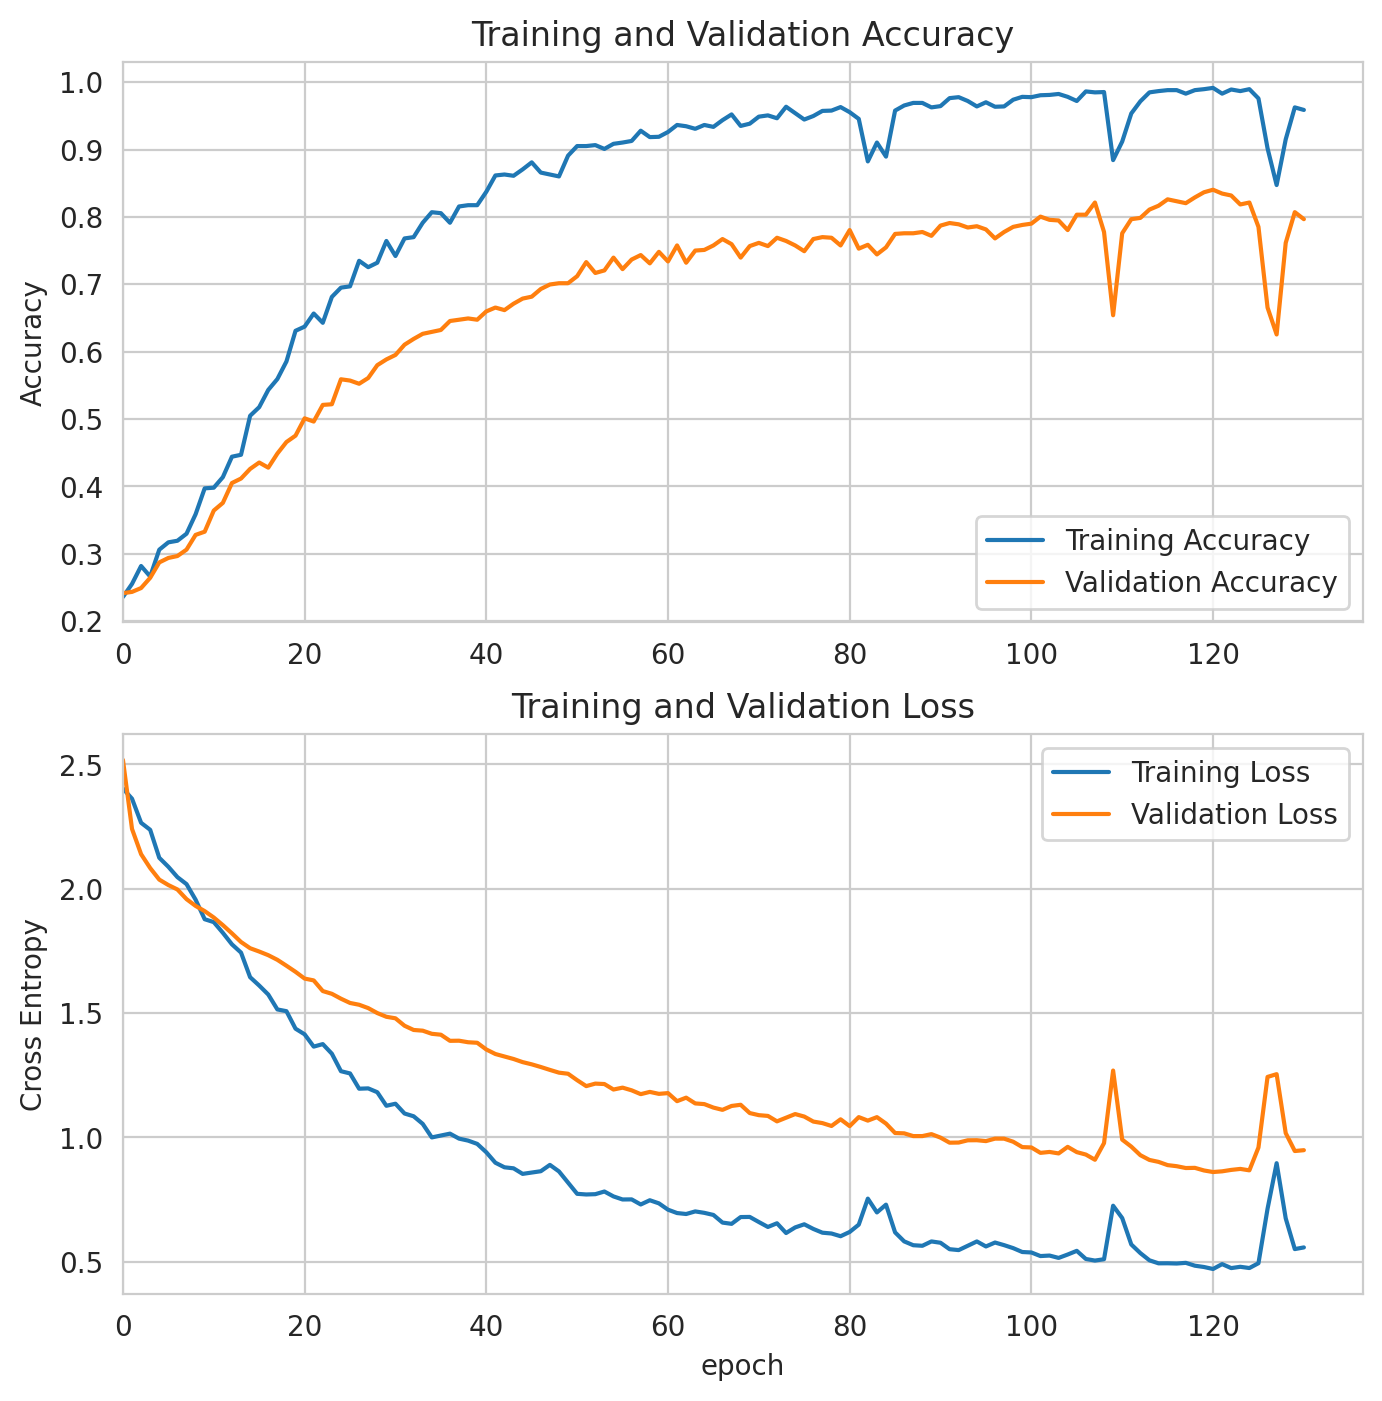

In [ ]:
learning_curves(acc,val_acc,loss,val_loss)

In [ ]:
def metrics(epoch_num):
  val_auc = history.loc[history['epoch']==epoch_num, ['val_auc']].values[0][0]
  auc = history.loc[history['epoch']==epoch_num, ['auc']].values[0][0]
  auc_diff = (auc - val_auc)*100 / auc
  print('AUC percentage difference is:', abs(auc_diff), '%')

  val_acc = history.loc[history['epoch']==epoch_num, ['val_categorical_accuracy']].values[0][0]
  acc = history.loc[history['epoch']==epoch_num, ['categorical_accuracy']].values[0][0]
  acc_diff = (acc - val_acc)*100 / acc
  print()
  print('Accuracy percentage difference is:', abs(acc_diff), '%')

In [ ]:
# check for generalisation using epoch 121
metrics(epoch_num=120)

AUC percentage difference is: 2.7931386599966688 %

Accuracy percentage difference is: 15.245873245914977 %


*Adding data augmentation layers to the EfficientNet model resulted in model requiring more epochs to learn, but achieve slightly better generalisation. Using model at* **epoch 121**, *the validation metrics are as follows:*

| Name               |   Scores   |
|:-------------------|:----------:|
|**AUC**                 |**0.9998**|
|**Categorical Accuracy**|**0.9915**|
|**F1 score**            |**0.9913**|
|**Loss**                |**0.4701**|
|**Precision**           |**0.9929**|
|**Recall**              |**0.9900**|


## **Evaluation**

**using test dataset**



In [ ]:
# choose model for evaluation
# load model
model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/DenseNet_121_b/DenseNet121_ep121_val0.860",
                                   custom_objects={'f1_score': f1_score})

### **Confusion matrix**


In [ ]:
# get predictions for confusion matrix
# class_names = train_ds.class_names # from previous cell
print(class_names)

print('===== test_ds predictions =====')
test_preds = model.predict(test_ds, verbose=1) # get test_ds predictions
# sample test_ds predictions
print(test_preds[2])
for array in [test_preds[2]]:
  print(f'{class_names[0]} probability is: {array[0]:.4f}')
  print(f'{class_names[1]} probability is: {array[1]:.4f}')
  print(f'{class_names[2]} probability is: {array[2]:.4f}')
  print(f'{class_names[3]} probability is: {array[3]:.4f}')
  break

print() #gap

print('===== train_ds predictions =====')
train_preds = model.predict(train_ds, verbose=1) # get train_ds predictions
# sample train_ds predictions
print(train_preds[:1])
for array in train_preds:
  print(f'{class_names[0]} probability is: {array[0]:.4f}')
  print(f'{class_names[1]} probability is: {array[1]:.4f}')
  print(f'{class_names[2]} probability is: {array[2]:.4f}')
  print(f'{class_names[3]} probability is: {array[3]:.4f}')
  break

print() #gap

print('===== val_ds predictions =====')
val_preds = model.predict(val_ds, verbose=1) # get val_ds predictions
# sample val_ds predictions
print(val_preds[:1])
for array in val_preds:
  print(f'{class_names[0]} probability is: {array[0]:.4f}')
  print(f'{class_names[1]} probability is: {array[1]:.4f}')
  print(f'{class_names[2]} probability is: {array[2]:.4f}')
  print(f'{class_names[3]} probability is: {array[3]:.4f}')
  break

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
===== test_ds predictions =====
34/34 [==============================] - 15s 100ms/step
[0.30230126 0.1364483  0.43543598 0.12581448]
cataract probability is: 0.3023
diabetic_retinopathy probability is: 0.1364
glaucoma probability is: 0.4354
normal probability is: 0.1258

===== train_ds predictions =====
66/66 [==============================] - 7s 103ms/step
[[0.8292028  0.0259217  0.10903907 0.03583653]]
cataract probability is: 0.8292
diabetic_retinopathy probability is: 0.0259
glaucoma probability is: 0.1090
normal probability is: 0.0358

===== val_ds predictions =====
33/33 [==============================] - 2s 73ms/step
[[0.91162777 0.04165812 0.04182752 0.00488669]]
cataract probability is: 0.9116
diabetic_retinopathy probability is: 0.0417
glaucoma probability is: 0.0418
normal probability is: 0.0049


In [ ]:
y_pred_probs = np.max(test_preds, axis=-1) # store probabilities of predictions for later use

In [ ]:
y_proba = test_preds # store all probabilities for later use in ROC curve
print(y_proba[:, 0][:3]) # predicted probability of cataract

[0.7201364  0.5114199  0.30230126]


##### **OHE predictions:**

In [ ]:
# convert prediction probabilities into ohe
# for confusion matrix

# for test_ds
idx = np.argmax(test_preds, axis=-1)
test_preds = np.zeros( test_preds.shape )
test_preds[ np.arange(test_preds.shape[0]), idx] = 1

#print(train_preds.argmax(axis=1))
#print(train_labels.argmax(axis=1))

# for train_ds
idx = np.argmax(train_preds, axis=-1)
train_preds = np.zeros( train_preds.shape )
train_preds[ np.arange(train_preds.shape[0]), idx] = 1

# for val_ds
idx = np.argmax(val_preds, axis=-1)
val_preds = np.zeros( val_preds.shape )
val_preds[ np.arange(val_preds.shape[0]), idx] = 1

print('Predicted test_ds labels:', test_preds[:5])
print() # gap
print('Predicted train_ds labels:', train_preds[:5])
print() # gap
print('Predicted val_ds labels:', val_preds[:5])

Predicted test_ds labels: [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

Predicted train_ds labels: [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]

Predicted val_ds labels: [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


##### **Extracting true labels:**

In [ ]:
# extract true labels and images from test_ds
test_labels = np.concatenate([y for x, y in test_ds], axis=0)
test_images = np.concatenate([x for x, y in test_ds], axis=0)

# extract true labels and images from train_ds
train_labels = np.concatenate([y for x, y in train_ds], axis=0)
train_images = np.concatenate([x for x, y in train_ds], axis=0)

# extract true labels and images from val_ds
val_labels = np.concatenate([y for x, y in val_ds], axis=0)
val_images = np.concatenate([x for x, y in val_ds], axis=0)

print('===== Test set true labels =====')
print(test_labels[:5])
print() # gap
print('===== Train set true labels =====')
print(train_labels[:5])
print() # gap
print('===== Validation set true labels =====')
print(val_labels[:5])

===== Test set true labels =====
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

===== Train set true labels =====
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

===== Validation set true labels =====
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


##### **Plot confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
# Creating a confusion matrix for test_ds predictions
test_cm = confusion_matrix(test_labels.argmax(axis=1), test_preds.argmax(axis=1))
# Creating a confusion matrix for train_ds predictions
train_cm = confusion_matrix(train_labels.argmax(axis=1), train_preds.argmax(axis=1))
# Creating a confusion matrix for val_ds predictions
val_cm = confusion_matrix(val_labels.argmax(axis=1), val_preds.argmax(axis=1))

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
test_cm_df = pd.DataFrame(test_cm,
                          index = class_names,
                          columns = class_names)
train_cm_df = pd.DataFrame(train_cm,
                           index = class_names,
                           columns = class_names)
val_cm_df = pd.DataFrame(val_cm,
                         index = class_names,
                         columns = class_names)

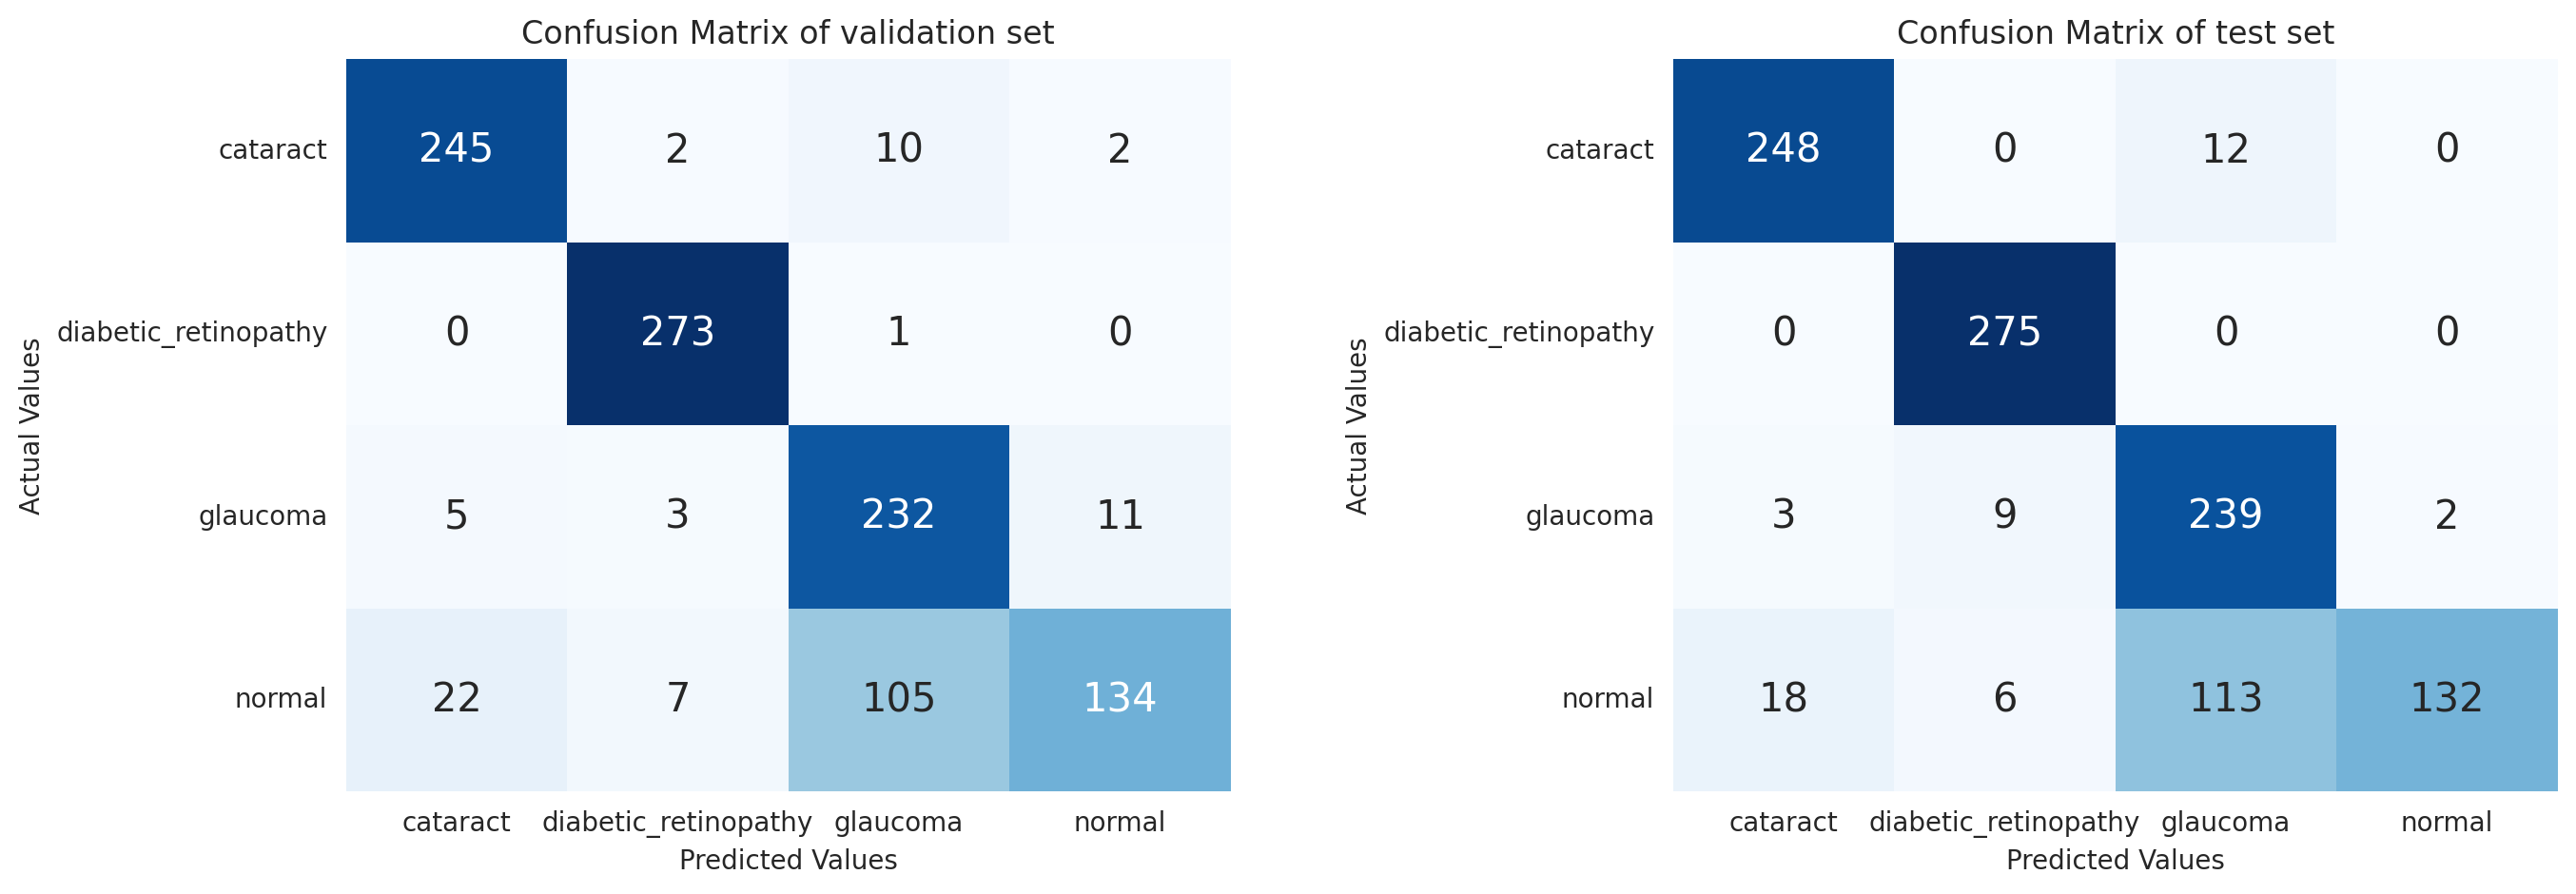

In [ ]:
#Plotting confusion matrices using heatmap
fig, axes = plt.subplots(1, 2, figsize=(15,5))
#sns.heatmap(train_cm_df, annot=True, cbar=False, cmap='Blues', vmin=0, fmt='.3g', annot_kws={"size": 15}, ax=axes[0])
#axes[0].set_title('Confusion Matrix of train set')
#axes[0].set_ylabel('Actual Values')
#axes[0].set_xlabel('Predicted Values')

sns.heatmap(val_cm_df, annot=True, cbar=False, cmap='Blues', vmin=0, fmt='.3g', annot_kws={"size": 15}, ax=axes[0])
axes[0].set_title('Confusion Matrix of validation set')
axes[0].set_ylabel('Actual Values')
axes[0].set_xlabel('Predicted Values')

sns.heatmap(test_cm_df, annot=True, cbar=False, cmap='Blues', vmin=0, fmt='.3g', annot_kws={"size": 15}, ax=axes[1])
axes[1].set_title('Confusion Matrix of test set')
axes[1].set_ylabel('Actual Values')
axes[1].set_xlabel('Predicted Values')

plt.subplots_adjust(wspace=0.5)

plt.show()

### **Classification report**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, test_preds, target_names=class_names, digits= 4))

                      precision    recall  f1-score   support

            cataract     0.9219    0.9538    0.9376       260
diabetic_retinopathy     0.9483    1.0000    0.9735       275
            glaucoma     0.6566    0.9447    0.7747       253
              normal     0.9851    0.4907    0.6551       269

           micro avg     0.8458    0.8458    0.8458      1057
           macro avg     0.8780    0.8473    0.8352      1057
        weighted avg     0.8813    0.8458    0.8360      1057
         samples avg     0.8458    0.8458    0.8458      1057



## **Misclassified test images**

In [ ]:
# extract test file names from test_ds
# this cannot do with tensorflow datasets that are prefetched autotuned
test_filenames = test_ds.file_paths

In [ ]:
len(test_filenames)

1057

In [ ]:
class_names

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

In [ ]:
# convert OHE to interger version of class_names for easier comparison
y_true = tf.argmax(test_labels, axis=1).numpy() # tensor object not iterable, use numpy to convert to list
y_pred = tf.argmax(test_preds, axis=1).numpy()
print('First 5 true labels:', y_true[:5])
print('First 5 predictions:', y_pred[:5])

error_list = []

for a, b, c, d in zip(y_true, y_pred, y_pred_probs, test_filenames):
  if a != b:
    error_list.append((class_names[a],class_names[b],c,d))

First 5 true labels: [0 0 0 0 0]
First 5 predictions: [0 0 2 0 0]


In [ ]:
len(error_list)

163

In [ ]:
print('Prediction accuracy on test data:', 100 - (len(error_list)*100/len(test_filenames)), '%')

Prediction accuracy on test data: 84.57899716177862 %


### **Looking into specific images that were misclassified**

In [ ]:
error_list[:5] # check for duplicates

[('cataract',
  'glaucoma',
  0.43543705,
  './work_directory/test/cataract/1102_left.jpg'),
 ('cataract',
  'glaucoma',
  0.5259951,
  './work_directory/test/cataract/2159_left.jpg'),
 ('cataract',
  'glaucoma',
  0.58093345,
  './work_directory/test/cataract/_110_5076150.jpg'),
 ('cataract',
  'glaucoma',
  0.43226424,
  './work_directory/test/cataract/_176_4641501.jpg'),
 ('cataract',
  'glaucoma',
  0.6711225,
  './work_directory/test/cataract/_243_1070648.jpg')]

In [ ]:
def print_in_color(txt_msg,fore_tupple=(0,255,255),back_tupple=(100,100,100)):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    # default parameter print in cyan foreground and gray background
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m'
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return

# example default print
msg='test of default colors'
print_in_color(msg)

test of default colors



In [ ]:
import re

print ('Below is a list of test files that were misclassified \n')
msg='{0:^10}{1:^30s}{2:^20s}{3:^20s}{4:^15s}'.format('No.','Test File','True Label','Predicted as','Probability')
print_in_color(msg)

for i, (a, b, c, d) in enumerate(error_list):
  x = re.split('./work_directory/test/', d)[-1]
  print('{0:^10}{1:^30s}{2:^20s}{3:^20s}  {4:.4f}'.format(i+1,x,a,b,c))

Below is a list of test files that were misclassified 

   No.              Test File                True Label         Predicted as      Probability  

    1         cataract/1102_left.jpg          cataract            glaucoma        0.4354
    2         cataract/2159_left.jpg          cataract            glaucoma        0.5260
    3       cataract/_110_5076150.jpg         cataract            glaucoma        0.5809
    4       cataract/_176_4641501.jpg         cataract            glaucoma        0.4323
    5       cataract/_243_1070648.jpg         cataract            glaucoma        0.6711
    6        cataract/_253_643151.jpg         cataract            glaucoma        0.4391
    7        cataract/_28_8675632.jpg         cataract            glaucoma        0.3988
    8        cataract/_36_1799809.jpg         cataract            glaucoma        0.5096
    9        cataract/_61_2475173.jpg         cataract            glaucoma        0.6797
    10       cataract/_6_4834075.jpg          

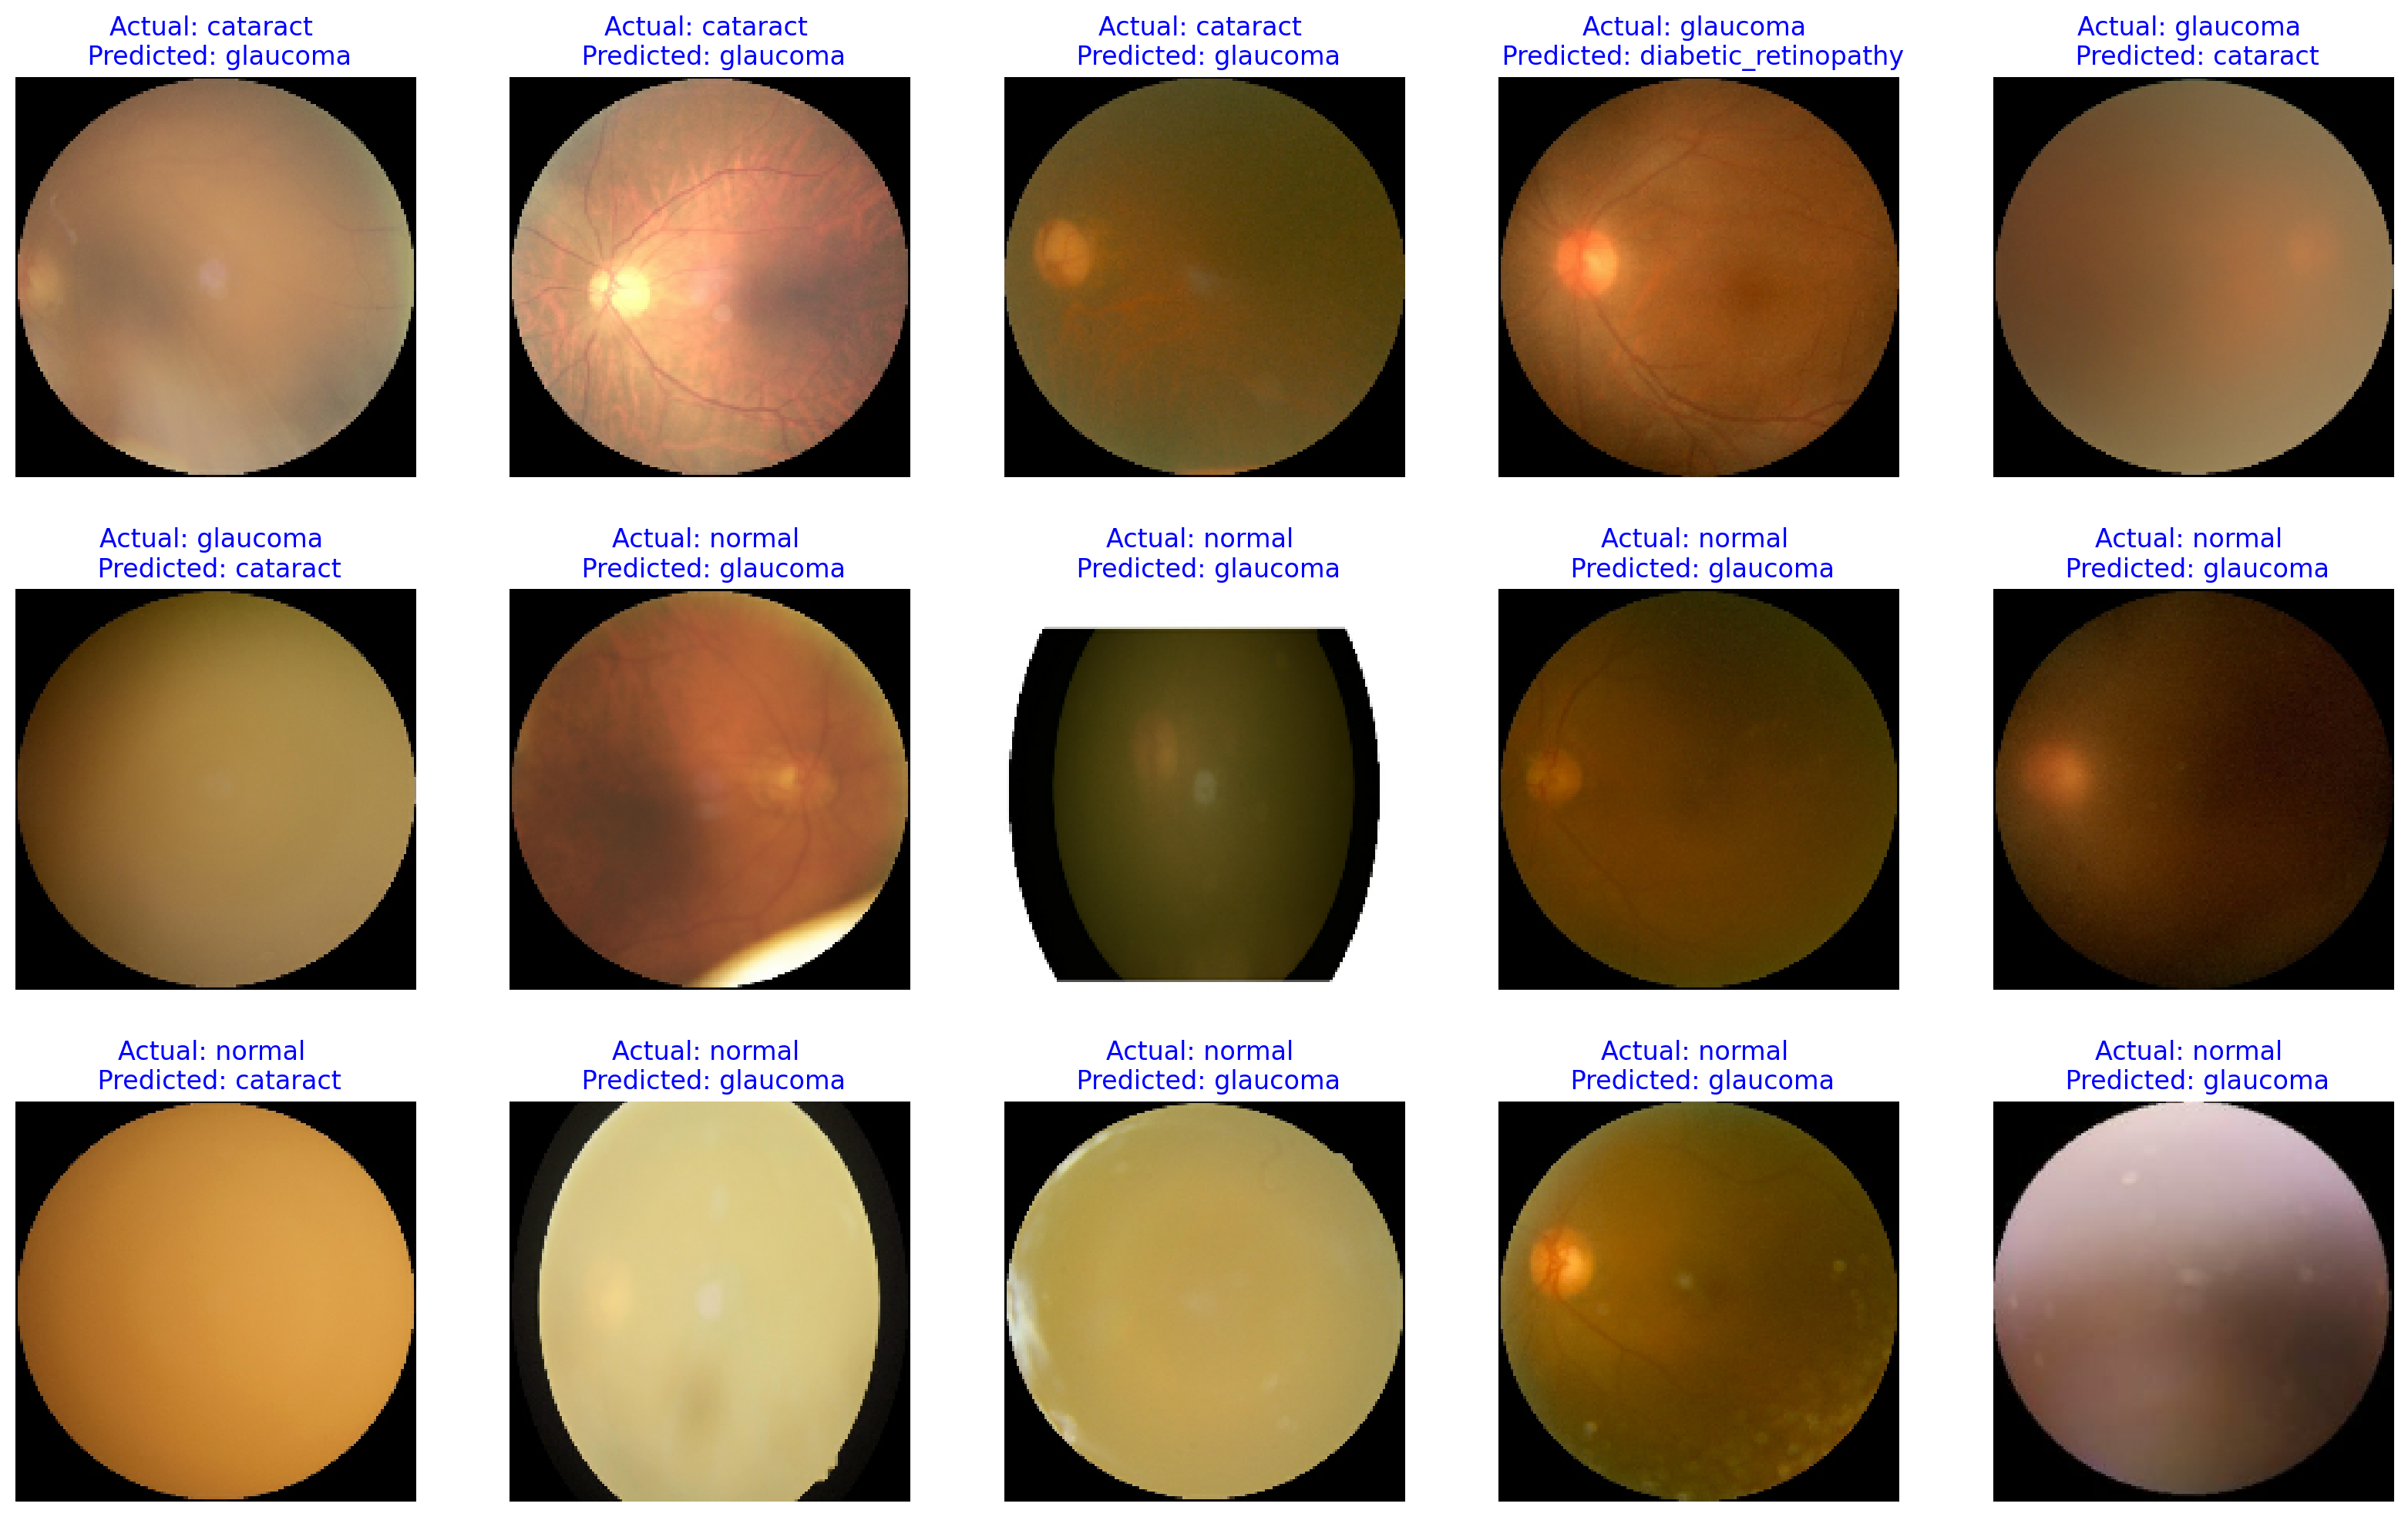

In [ ]:
# to display examples of each class that was wrongly classified
fig, axes = plt.subplots(3, 5, figsize=(20, 12)) # 3 rows, 5 cols

def axes_img(r,c,i):
  axes[r,c].imshow(test_images[i].astype('uint8'))
  axes[r,c].axis('off')
  axes[r,c].set_title(f'Actual: {error_list[i][0]} \n Predicted: {error_list[i][1]}', color='blue')

axes_img(r=0,c=0,i=0)  # first row - actual cataract
axes_img(r=0,c=1,i=5)
axes_img(r=0,c=2,i=10)
axes_img(r=0,c=3,i=15)
axes_img(r=0,c=4,i=20)

axes_img(r=1,c=0,i=23) # 2nd row - actual glaucoma
axes_img(r=1,c=1,i=29)
axes_img(r=1,c=2,i=35)
axes_img(r=1,c=3,i=42)
axes_img(r=1,c=4,i=48)

axes_img(r=2,c=0,i=50) # 3rd row - actual normal
axes_img(r=2,c=1,i=54)
axes_img(r=2,c=2,i=62)
axes_img(r=2,c=3,i=68)
axes_img(r=2,c=4,i=73)

plt.subplots_adjust(hspace=0.28) # add space between rows
plt.show()

# **Learning Curves (DenseNet-169)**

In [ ]:
history = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DenseNet_161/DenseNet161_history.csv')
history.head(3)

In [ ]:
acc = history['categorical_accuracy']
val_acc = history['val_categorical_accuracy']

loss = history['loss']
val_loss = history['val_loss']

In [ ]:
def learning_curves(acc,val_acc,loss,val_loss):
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim([min(plt.ylim()),max(plt.ylim())])
  plt.xlim([0,max(plt.xlim())])
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim([min(plt.ylim()),max(plt.ylim())])
  plt.xlim([0,max(plt.xlim())])
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()
  return plt.show()

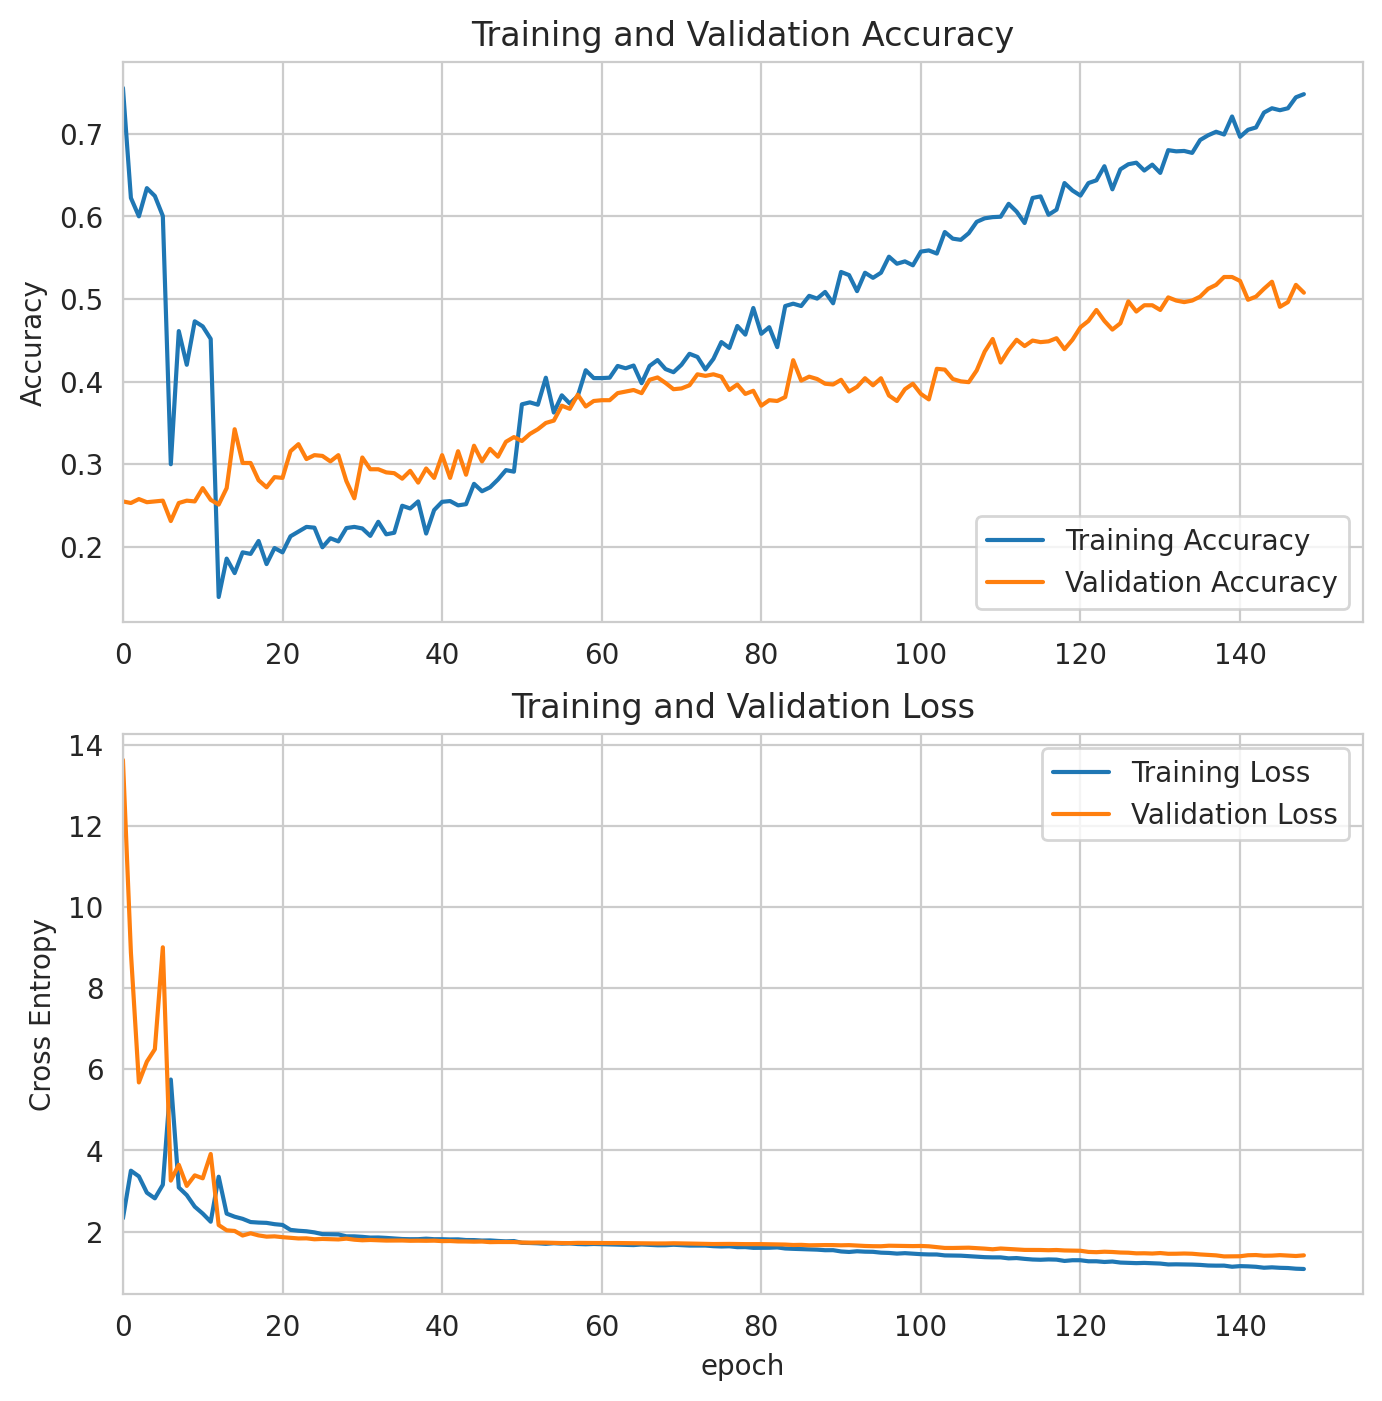

In [ ]:
learning_curves(acc,val_acc,loss,val_loss)

In [ ]:
def metrics(epoch_num):
  val_auc = history.loc[history['epoch']==epoch_num, ['val_auc']].values[0][0]
  auc = history.loc[history['epoch']==epoch_num, ['auc']].values[0][0]
  auc_diff = (auc - val_auc)*100 / auc
  print('AUC percentage difference is:', abs(auc_diff), '%')

  val_acc = history.loc[history['epoch']==epoch_num, ['val_categorical_accuracy']].values[0][0]
  acc = history.loc[history['epoch']==epoch_num, ['categorical_accuracy']].values[0][0]
  acc_diff = (acc - val_acc)*100 / acc
  print()
  print('Accuracy percentage difference is:', abs(acc_diff), '%')

In [ ]:
# check for generalisation using epoch 138
metrics(epoch_num=138)

AUC percentage difference is: 11.405424058258477 %

Accuracy percentage difference is: 24.687483937225462 %


In [ ]:
metrics(epoch_num=139)

AUC percentage difference is: 13.236940928787142 %

Accuracy percentage difference is: 26.966677117928338 %


*Adding data augmentation layers to the EfficientNet model resulted in model requiring more epochs to learn, but achieve slightly better generalisation. Using model at* **epoch 47**, *the validation metrics are as follows:*

| Name               |   Scores   |
|:-------------------|:----------:|
|AUC                 |0.9916225672|
|Categorical Accuracy|0.9420152307|
|F1 score            |0.943136692|
|Loss                |0.31233868|
|Precision           |0.9455587268|
|Recall              |0.9410646558|


## **Evaluation**

**using test dataset**



In [ ]:
# choose model for evaluation
# load model
model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/DenseNet_161/DenseNet161_ep139_val1.387",
                                   custom_objects={'f1_score': f1_score})

### **Confusion matrix**


In [ ]:
# get predictions for confusion matrix
# class_names = train_ds.class_names # from previous cell
print(class_names)

print('===== test_ds predictions =====')
test_preds = model.predict(test_ds, verbose=1) # get test_ds predictions
# sample test_ds predictions
print(test_preds[2])
for array in [test_preds[2]]:
  print(f'{class_names[0]} probability is: {array[0]:.4f}')
  print(f'{class_names[1]} probability is: {array[1]:.4f}')
  print(f'{class_names[2]} probability is: {array[2]:.4f}')
  print(f'{class_names[3]} probability is: {array[3]:.4f}')
  break

print() #gap

print('===== train_ds predictions =====')
train_preds = model.predict(train_ds, verbose=1) # get train_ds predictions
# sample train_ds predictions
print(train_preds[:1])
for array in train_preds:
  print(f'{class_names[0]} probability is: {array[0]:.4f}')
  print(f'{class_names[1]} probability is: {array[1]:.4f}')
  print(f'{class_names[2]} probability is: {array[2]:.4f}')
  print(f'{class_names[3]} probability is: {array[3]:.4f}')
  break

print() #gap

print('===== val_ds predictions =====')
val_preds = model.predict(val_ds, verbose=1) # get val_ds predictions
# sample val_ds predictions
print(val_preds[:1])
for array in val_preds:
  print(f'{class_names[0]} probability is: {array[0]:.4f}')
  print(f'{class_names[1]} probability is: {array[1]:.4f}')
  print(f'{class_names[2]} probability is: {array[2]:.4f}')
  print(f'{class_names[3]} probability is: {array[3]:.4f}')
  break

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
===== test_ds predictions =====
34/34 [==============================] - 11s 215ms/step
[0.21985652 0.16208914 0.35064483 0.26740953]
cataract probability is: 0.2199
diabetic_retinopathy probability is: 0.1621
glaucoma probability is: 0.3506
normal probability is: 0.2674

===== train_ds predictions =====
66/66 [==============================] - 12s 184ms/step
[[0.25687617 0.21147488 0.3975039  0.13414499]]
cataract probability is: 0.2569
diabetic_retinopathy probability is: 0.2115
glaucoma probability is: 0.3975
normal probability is: 0.1341

===== val_ds predictions =====
33/33 [==============================] - 7s 214ms/step
[[0.47009745 0.34088743 0.15580425 0.03321088]]
cataract probability is: 0.4701
diabetic_retinopathy probability is: 0.3409
glaucoma probability is: 0.1558
normal probability is: 0.0332


In [ ]:
y_pred_probs = np.max(test_preds, axis=-1) # store probabilities of predictions for later use

In [ ]:
y_proba = test_preds # store all probabilities for later use in ROC curve
print(y_proba[:, 0][:3]) # predicted probability of cataract

[0.23243752 0.3120686  0.21985652]


##### **OHE predictions:**

In [ ]:
# convert prediction probabilities into ohe
# for confusion matrix

# for test_ds
idx = np.argmax(test_preds, axis=-1)
test_preds = np.zeros( test_preds.shape )
test_preds[ np.arange(test_preds.shape[0]), idx] = 1

#print(train_preds.argmax(axis=1))
#print(train_labels.argmax(axis=1))

# for train_ds
idx = np.argmax(train_preds, axis=-1)
train_preds = np.zeros( train_preds.shape )
train_preds[ np.arange(train_preds.shape[0]), idx] = 1

# for val_ds
idx = np.argmax(val_preds, axis=-1)
val_preds = np.zeros( val_preds.shape )
val_preds[ np.arange(val_preds.shape[0]), idx] = 1

print('Predicted test_ds labels:', test_preds[:5])
print() # gap
print('Predicted train_ds labels:', train_preds[:5])
print() # gap
print('Predicted val_ds labels:', val_preds[:5])

Predicted test_ds labels: [[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]

Predicted train_ds labels: [[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]

Predicted val_ds labels: [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


##### **Extracting true labels:**

In [ ]:
# extract true labels and images from test_ds
test_labels = np.concatenate([y for x, y in test_ds], axis=0)
test_images = np.concatenate([x for x, y in test_ds], axis=0)

# extract true labels and images from train_ds
train_labels = np.concatenate([y for x, y in train_ds], axis=0)
train_images = np.concatenate([x for x, y in train_ds], axis=0)

# extract true labels and images from val_ds
val_labels = np.concatenate([y for x, y in val_ds], axis=0)
val_images = np.concatenate([x for x, y in val_ds], axis=0)

print('===== Test set true labels =====')
print(test_labels[:5])
print() # gap
print('===== Train set true labels =====')
print(train_labels[:5])
print() # gap
print('===== Validation set true labels =====')
print(val_labels[:5])

===== Test set true labels =====
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

===== Train set true labels =====
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

===== Validation set true labels =====
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


##### **Plot confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
# Creating a confusion matrix for test_ds predictions
test_cm = confusion_matrix(test_labels.argmax(axis=1), test_preds.argmax(axis=1))
# Creating a confusion matrix for train_ds predictions
train_cm = confusion_matrix(train_labels.argmax(axis=1), train_preds.argmax(axis=1))
# Creating a confusion matrix for val_ds predictions
val_cm = confusion_matrix(val_labels.argmax(axis=1), val_preds.argmax(axis=1))

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
test_cm_df = pd.DataFrame(test_cm,
                          index = class_names,
                          columns = class_names)
train_cm_df = pd.DataFrame(train_cm,
                           index = class_names,
                           columns = class_names)
val_cm_df = pd.DataFrame(val_cm,
                         index = class_names,
                         columns = class_names)

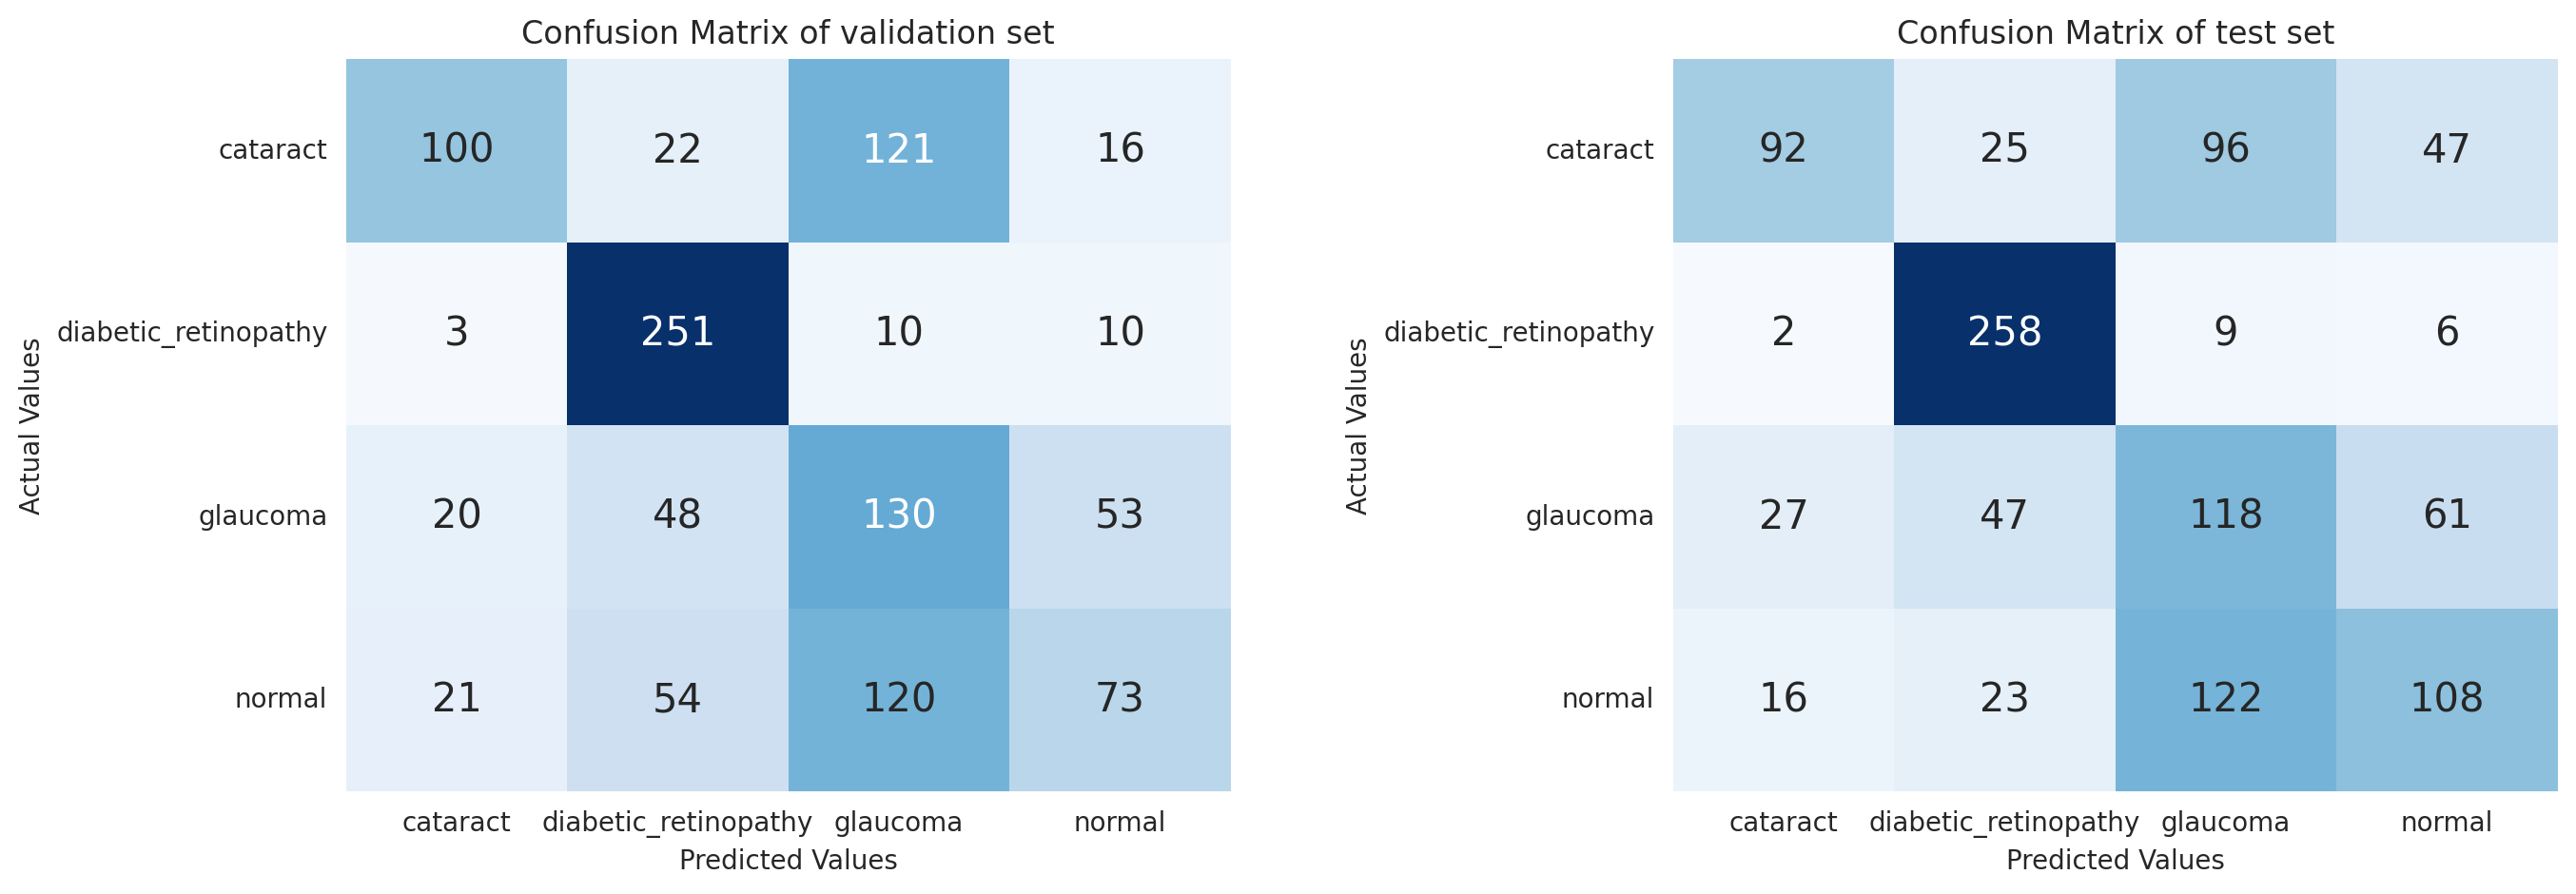

In [ ]:
#Plotting confusion matrices using heatmap
fig, axes = plt.subplots(1, 2, figsize=(15,5))
#sns.heatmap(train_cm_df, annot=True, cbar=False, cmap='Blues', vmin=0, fmt='.3g', annot_kws={"size": 15}, ax=axes[0])
#axes[0].set_title('Confusion Matrix of train set')
#axes[0].set_ylabel('Actual Values')
#axes[0].set_xlabel('Predicted Values')

sns.heatmap(val_cm_df, annot=True, cbar=False, cmap='Blues', vmin=0, fmt='.3g', annot_kws={"size": 15}, ax=axes[0])
axes[0].set_title('Confusion Matrix of validation set')
axes[0].set_ylabel('Actual Values')
axes[0].set_xlabel('Predicted Values')

sns.heatmap(test_cm_df, annot=True, cbar=False, cmap='Blues', vmin=0, fmt='.3g', annot_kws={"size": 15}, ax=axes[1])
axes[1].set_title('Confusion Matrix of test set')
axes[1].set_ylabel('Actual Values')
axes[1].set_xlabel('Predicted Values')

plt.subplots_adjust(wspace=0.5)

plt.show()

### **Classification report**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, test_preds, target_names=class_names, digits= 4))

                      precision    recall  f1-score   support

            cataract     0.6715    0.3538    0.4635       260
diabetic_retinopathy     0.7309    0.9382    0.8217       275
            glaucoma     0.3420    0.4664    0.3946       253
              normal     0.4865    0.4015    0.4399       269

           micro avg     0.5449    0.5449    0.5449      1057
           macro avg     0.5577    0.5400    0.5299      1057
        weighted avg     0.5610    0.5449    0.5342      1057
         samples avg     0.5449    0.5449    0.5449      1057



Model is not great at differentiating glaucoma from normal, which makes sense as retinal images of glaucoma and normal retinas can be quite similar. The model is best at identifying diabetic retinopathy.

## **Misclassified test images**

In [ ]:
# extract test file names from test_ds
# this cannot do with tensorflow datasets that are prefetched autotuned
test_filenames = test_ds.file_paths

In [ ]:
len(test_filenames)

1057

In [ ]:
class_names

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

In [ ]:
# convert OHE to interger version of class_names for easier comparison
y_true = tf.argmax(test_labels, axis=1).numpy() # tensor object not iterable, use numpy to convert to list
y_pred = tf.argmax(test_preds, axis=1).numpy()
print('First 5 true labels:', y_true[:5])
print('First 5 predictions:', y_pred[:5])

error_list = []

for a, b, c, d in zip(y_true, y_pred, y_pred_probs, test_filenames):
  if a != b:
    error_list.append((class_names[a],class_names[b],c,d))

First 5 true labels: [0 0 0 0 0]
First 5 predictions: [2 0 2 2 2]


In [ ]:
len(error_list)

481

In [ ]:
print('Prediction accuracy on test data:', 100 - (len(error_list)*100/len(test_filenames)), '%')

Prediction accuracy on test data: 54.49385052034059 %


### **Looking into specific images that were misclassified**

In [ ]:
error_list[:5] # check for duplicates

[('cataract',
  'glaucoma',
  0.32192478,
  './work_directory/test/cataract/103_left.jpg'),
 ('cataract',
  'glaucoma',
  0.35064483,
  './work_directory/test/cataract/1102_left.jpg'),
 ('cataract',
  'glaucoma',
  0.36477405,
  './work_directory/test/cataract/112_right.jpg'),
 ('cataract',
  'glaucoma',
  0.37142372,
  './work_directory/test/cataract/1164_left.jpg'),
 ('cataract',
  'normal',
  0.3571907,
  './work_directory/test/cataract/119_left.jpg')]

In [ ]:
def print_in_color(txt_msg,fore_tupple=(0,255,255),back_tupple=(100,100,100)):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    # default parameter print in cyan foreground and gray background
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m'
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return

# example default print
msg='test of default colors'
print_in_color(msg)

test of default colors



In [ ]:
import re

print ('Below is a list of test files that were misclassified \n')
msg='{0:^10}{1:^30s}{2:^20s}{3:^20s}{4:^15s}'.format('No.','Test File','True Label','Predicted as','Probability')
print_in_color(msg)

for i, (a, b, c, d) in enumerate(error_list):
  x = re.split('./work_directory/test/', d)[-1]
  print('{0:^10}{1:^30s}{2:^20s}{3:^20s}  {4:.4f}'.format(i+1,x,a,b,c))

Below is a list of test files that were misclassified 

   No.              Test File                True Label         Predicted as      Probability  

    1         cataract/103_left.jpg           cataract            glaucoma        0.3219
    2         cataract/1102_left.jpg          cataract            glaucoma        0.3506
    3         cataract/112_right.jpg          cataract            glaucoma        0.3648
    4         cataract/1164_left.jpg          cataract            glaucoma        0.3714
    5         cataract/119_left.jpg           cataract             normal         0.3572
    6        cataract/1415_right.jpg          cataract            glaucoma        0.3403
    7         cataract/1435_left.jpg          cataract      diabetic_retinopathy  0.3755
    8        cataract/1454_right.jpg          cataract            glaucoma        0.3550
    9         cataract/1456_left.jpg          cataract            glaucoma        0.3602
    10        cataract/1468_left.jpg          

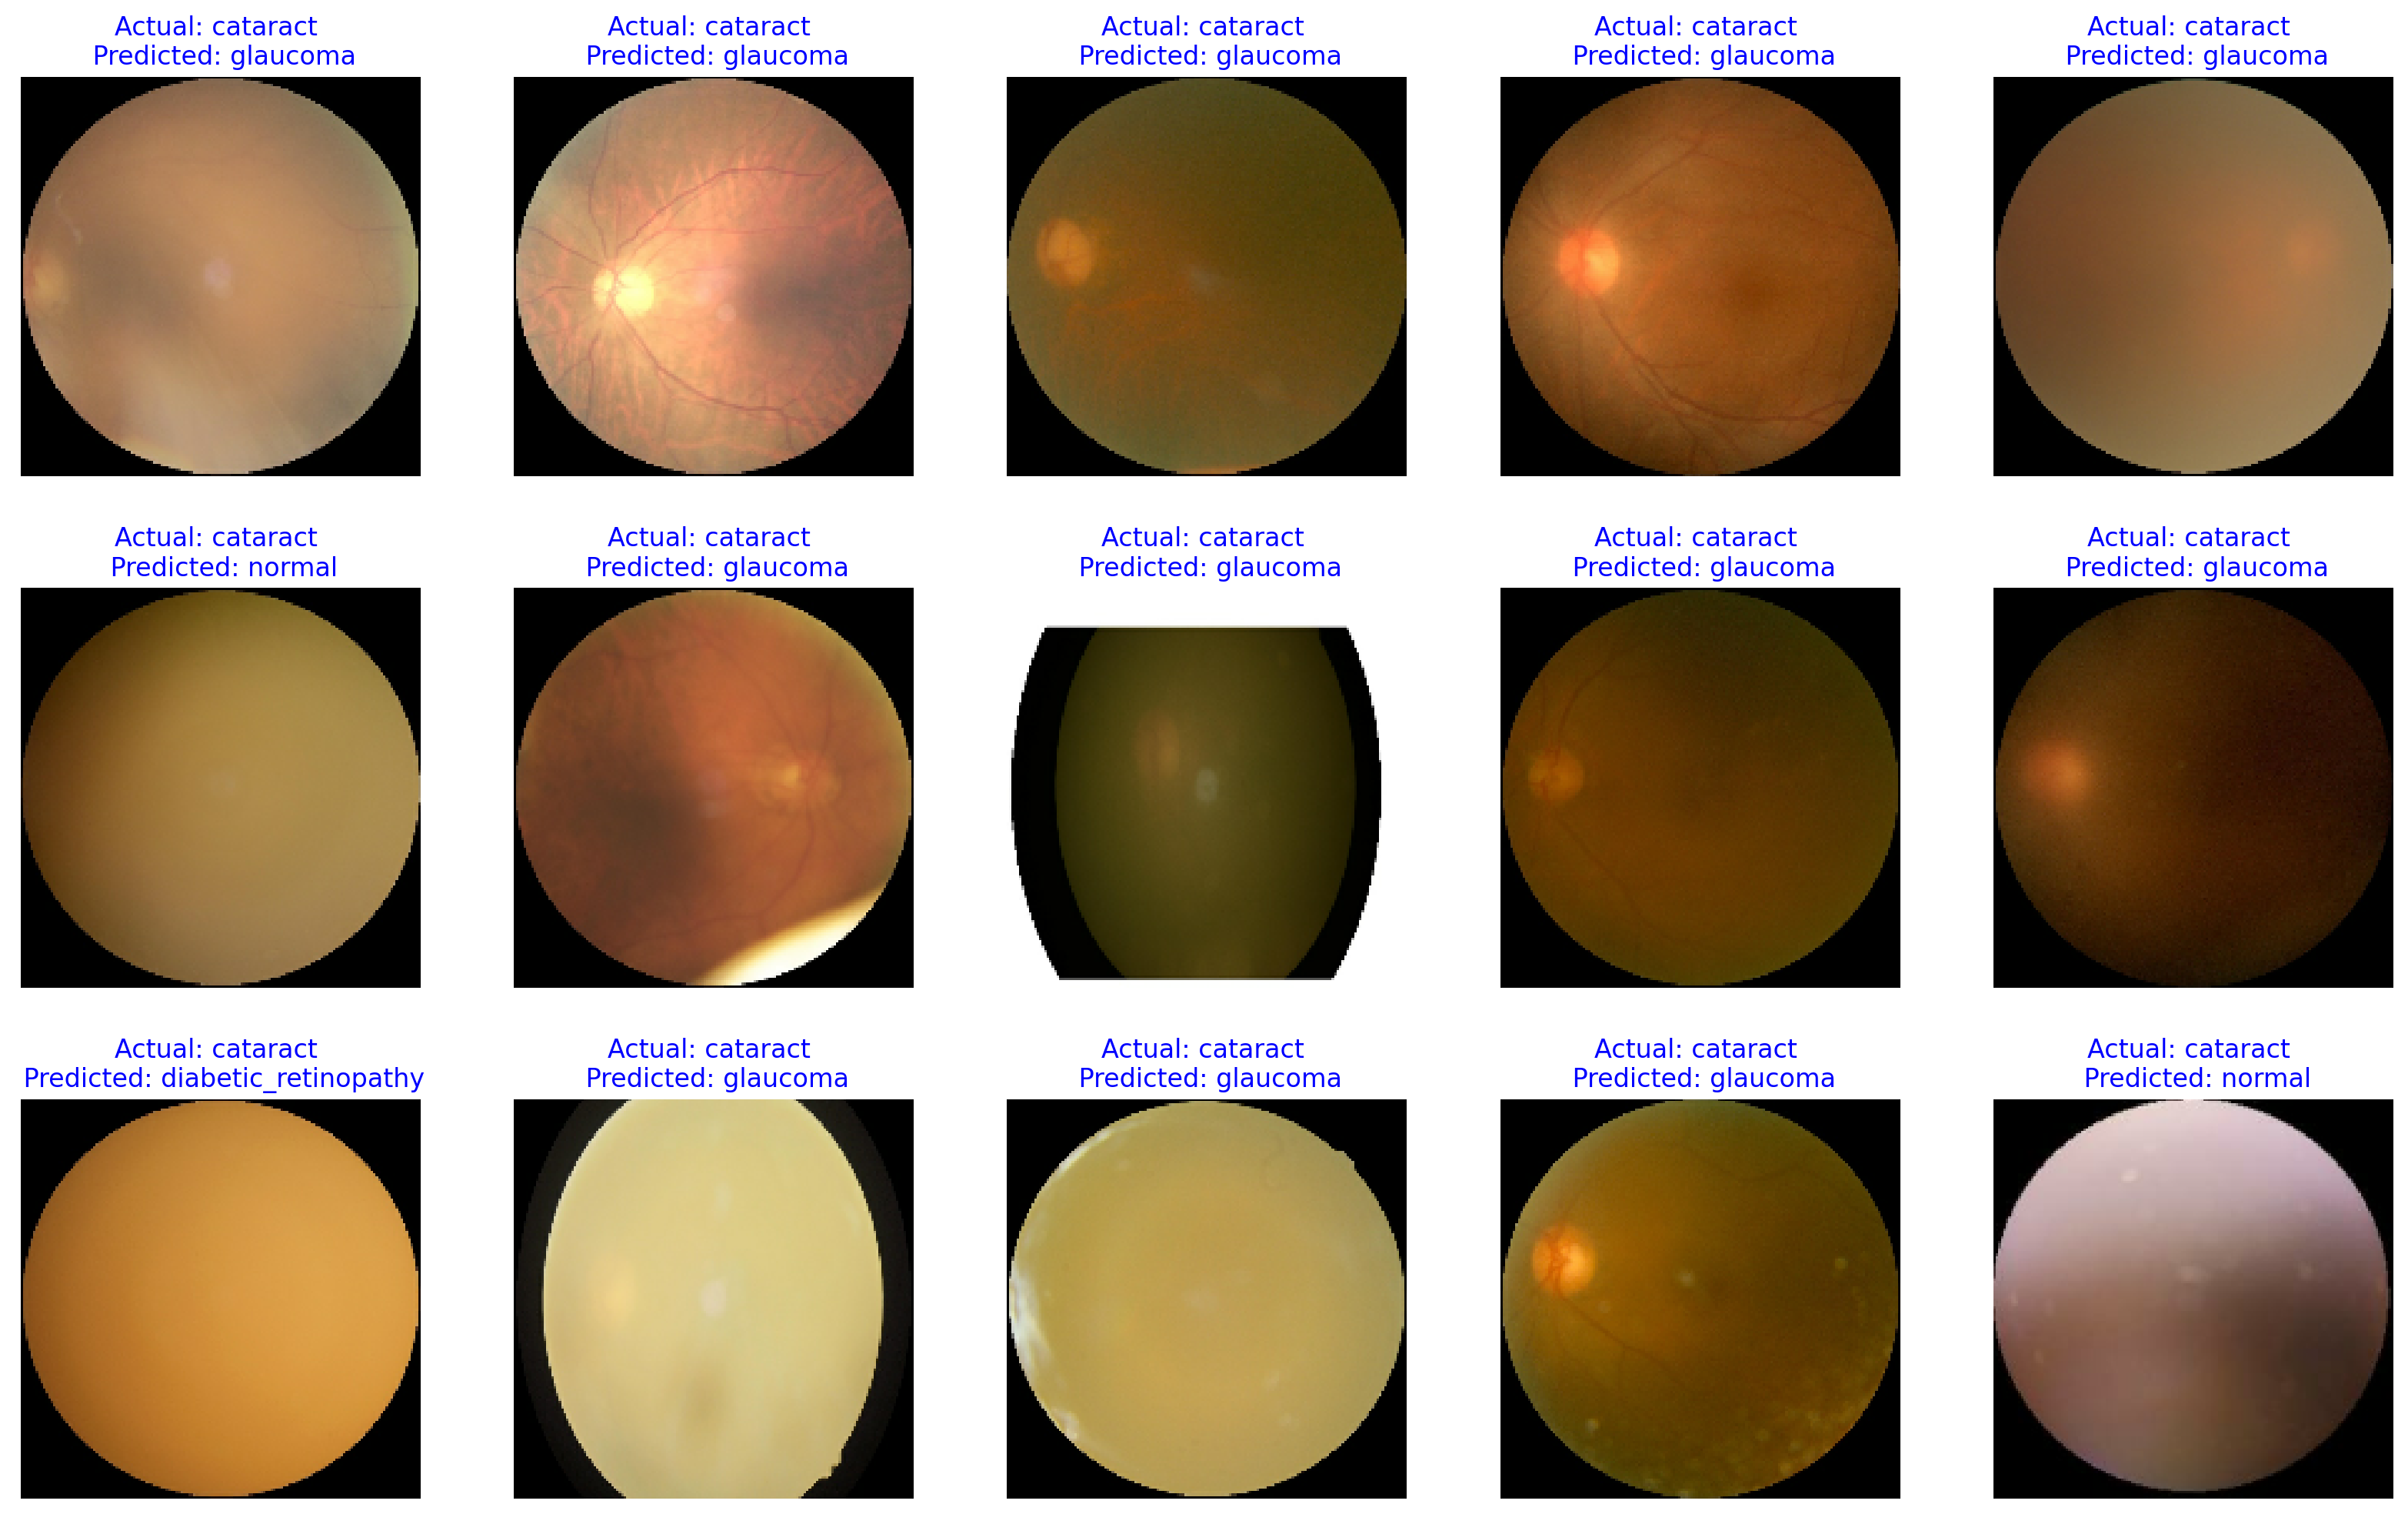

In [ ]:
# to display examples of each class that was wrongly classified
fig, axes = plt.subplots(3, 5, figsize=(20, 12)) # 3 rows, 5 cols

def axes_img(r,c,i):
  axes[r,c].imshow(test_images[i].astype('uint8'))
  axes[r,c].axis('off')
  axes[r,c].set_title(f'Actual: {error_list[i][0]} \n Predicted: {error_list[i][1]}', color='blue')

axes_img(r=0,c=0,i=0)  # first row - actual cataract
axes_img(r=0,c=1,i=5)
axes_img(r=0,c=2,i=10)
axes_img(r=0,c=3,i=15)
axes_img(r=0,c=4,i=20)

axes_img(r=1,c=0,i=23) # 2nd row - actual glaucoma
axes_img(r=1,c=1,i=29)
axes_img(r=1,c=2,i=35)
axes_img(r=1,c=3,i=42)
axes_img(r=1,c=4,i=48)

axes_img(r=2,c=0,i=50) # 3rd row - actual normal
axes_img(r=2,c=1,i=54)
axes_img(r=2,c=2,i=62)
axes_img(r=2,c=3,i=68)
axes_img(r=2,c=4,i=73)

plt.subplots_adjust(hspace=0.28) # add space between rows
plt.show()

Images labelled as normal but were wrongly classified by algorithm were due to poorly taken images or images that may have been wrongly labelled by dataset collator.

For images that were labelled as glaucoma but wrongly classified as either normal or cataract were images that had poor resolution or distorted images.

For images that were labelled as cataract but wrongly classified as either normal or glaucoma were images with mild cataract - which would be mistaken by algorithm as normal. It is not clear why the algorithm mistaken classify a cataract image as glaucoma.